# Initialisation

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances

os.environ["OMP_NUM_THREADS"] = '4'
path = '../artificial/'

# Code

---------------------------------------
Affichage données initiales            xclara.arff


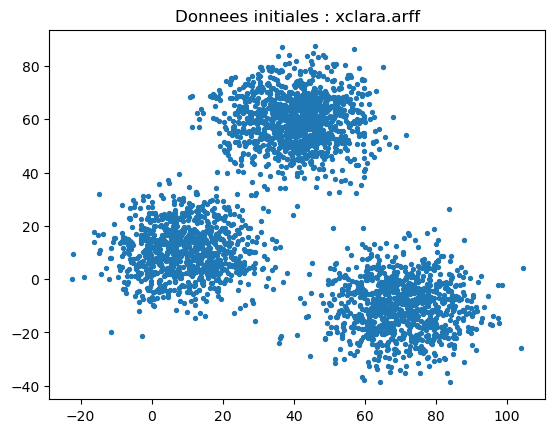

------------------------------------------------------
Appel KMeans pour une valeur de k fixée


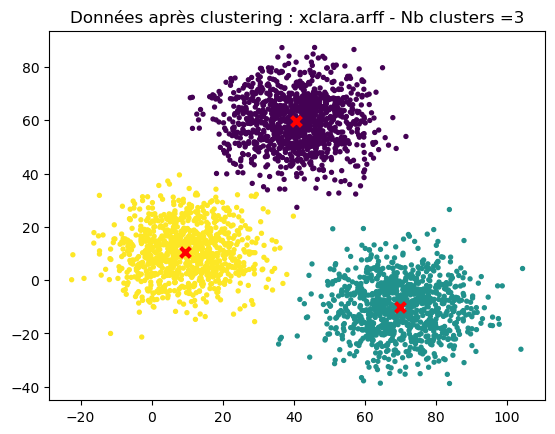

nb clusters = 3 , nb iter = 3 , inertie =  611605.880693389 , runtime =  11.77 ms
[[ 0.         75.71005186 58.11810068]
 [75.71005186  0.         63.92661838]
 [58.11810068 63.92661838  0.        ]]


In [2]:
##################################################################
# Exemple :  k-Means Clustering

name="xclara.arff"

databrut = arff.loadarff(open(path+str(name), 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])

print("---------------------------------------")
print("Affichage données initiales            "+ str(name))
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1] # tous les éléments de la deuxième colonne

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales : "+ str(name))
plt.show()

# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k fixée")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

dists = euclidean_distances(centroids)
print(dists)

------------------------------------------------------
Appel KMeans pour une valeur de k =3


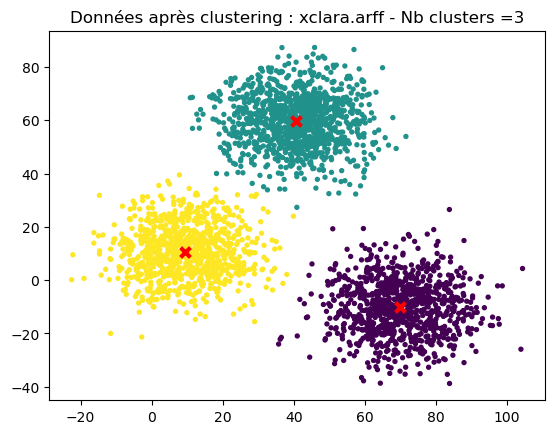

nb clusters = 3 , nb iter = 2 , inertie =  611605.880693389 , runtime =  7.51 ms
[[ 0.         75.71005186 63.92661838]
 [75.71005186  0.         58.11810068]
 [63.92661838 58.11810068  0.        ]]


In [3]:
# Run clustering method for a given number of clusters
print("------------------------------------------------------")
print("Appel KMeans pour une valeur de k =3")
tps1 = time.time()
k=3
model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
# informations sur le clustering obtenu
iteration = model.n_iter_
inertie = model.inertia_
centroids = model.cluster_centers_

plt.scatter(f0, f1, c=labels, s=8)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
plt.show()

print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")

dists = euclidean_distances(centroids)
print(dists)

In [4]:
# Calcul de la distance minimale entre chaque point de données et son centre de cluster
min_distances = np.min(pairwise_distances(datanp, centroids), axis=1)

# Calcul de la distance maximale entre chaque point de données et son centre de cluster
max_distances = np.max(pairwise_distances(datanp, centroids), axis=1)

# Calcul de la distance moyenne entre chaque point de données et son centre de cluster
mean_distances = np.mean(pairwise_distances(datanp, centroids))

print(min_distances)
print(max_distances)
print(mean_distances)

[15.7742349   9.87655463  9.04449993 ...  5.47219431 20.90805072
 15.5959933 ]
[73.8545108  58.08388842 71.01508094 ... 74.13522418 87.65757848
 87.98558269]
48.79753445051779


------------------------------------------------------
Appel KMeans pour une valeur de k  2


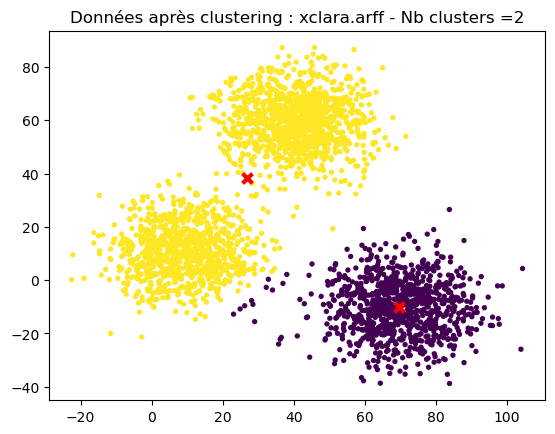

nb clusters = 2 , nb iter = 4 , inertie =  [2309985.389168787] , runtime =  10.79 ms
[[ 0.         64.51952964]
 [64.51952964  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  3


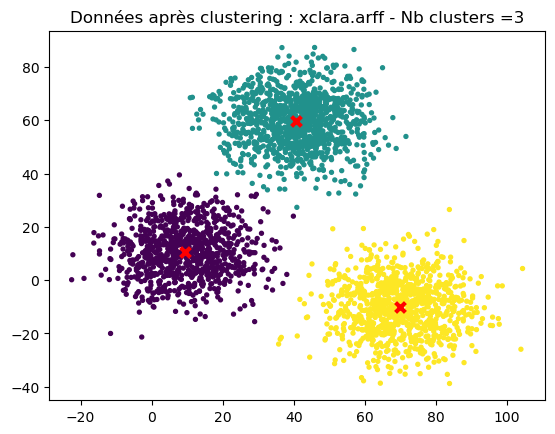

nb clusters = 3 , nb iter = 2 , inertie =  [2309985.389168787, 611605.8806933891] , runtime =  3.7 ms
[[ 0.         58.11810068 63.92661838]
 [58.11810068  0.         75.71005186]
 [63.92661838 75.71005186  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  4


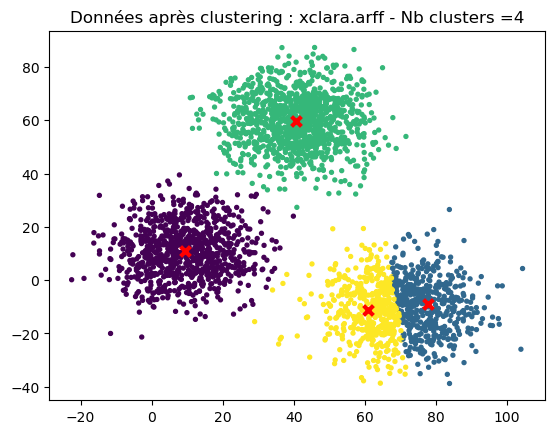

nb clusters = 4 , nb iter = 4 , inertie =  [2309985.389168787, 611605.8806933891, 545389.9156054822] , runtime =  5.03 ms
[[ 0.         71.15686491 58.12067357 56.01937043]
 [71.15686491  0.         78.17567483 16.87924113]
 [58.12067357 78.17567483  0.         73.70548782]
 [56.01937043 16.87924113 73.70548782  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  5


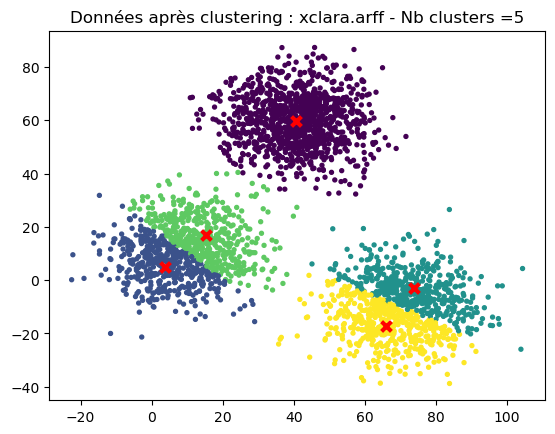

nb clusters = 5 , nb iter = 9 , inertie =  [2309985.389168787, 611605.8806933891, 545389.9156054822, 485475.49998693954] , runtime =  5.84 ms
[[ 0.         66.34341595 70.92195451 50.06919513 81.17837425]
 [66.34341595  0.         70.6417515  16.61938889 66.01692763]
 [70.92195451 70.6417515   0.         61.84635635 16.58229802]
 [50.06919513 16.61938889 61.84635635  0.         61.03362969]
 [81.17837425 66.01692763 16.58229802 61.03362969  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  6


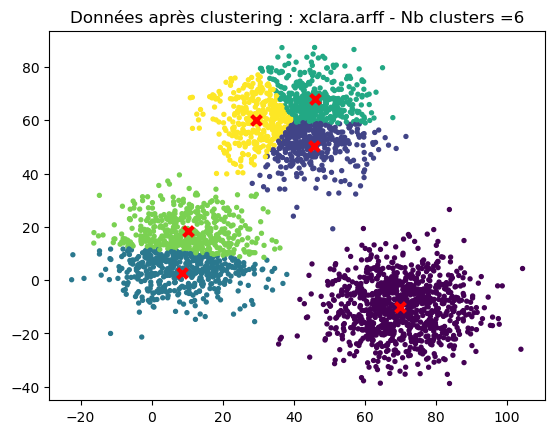

nb clusters = 6 , nb iter = 6 , inertie =  [2309985.389168787, 611605.8806933891, 545389.9156054822, 485475.49998693954, 429751.6709593937] , runtime =  7.22 ms
[[ 0.         65.23316776 62.80494898 81.52954919 66.04021174 81.14855832]
 [65.23316776  0.         60.40475133 17.41226607 47.61440206 18.95056318]
 [62.80494898 60.40475133  0.         75.09433443 15.73458243 61.06742657]
 [81.52954919 17.41226607 75.09433443  0.         60.92845961 18.31762888]
 [66.04021174 47.61440206 15.73458243 60.92845961  0.         45.87881022]
 [81.14855832 18.95056318 61.06742657 18.31762888 45.87881022  0.        ]]
------------------------------------------------------
Appel KMeans pour une valeur de k  7


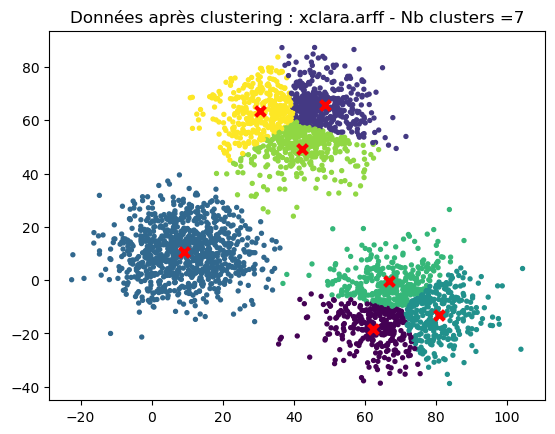

nb clusters = 7 , nb iter = 9 , inertie =  [2309985.389168787, 611605.8806933891, 545389.9156054822, 485475.49998693954, 429751.6709593937, 372610.06713716715] , runtime =  6.18 ms
[[ 0.         85.05693745 60.26536484 19.26514753 18.4376308  70.25329307
  87.44343071]
 [85.05693745  0.         67.92030512 85.34149494 68.55758459 17.78072994
  18.39522916]
 [60.26536484 67.92030512  0.         75.46330713 58.60170408 50.9029265
  56.89197441]
 [19.26514753 85.34149494 75.46330713  0.         19.0821302  73.38154282
  91.64248024]
 [18.4376308  68.55758459 58.60170408 19.0821302   0.         55.24802291
  73.27066833]
 [70.25329307 17.78072994 50.9029265  73.38154282 55.24802291  0.
  18.41812693]
 [87.44343071 18.39522916 56.89197441 91.64248024 73.27066833 18.41812693
   0.        ]]


In [5]:
k_valeurs = range(2, 8)
inertie = []

for k in k_valeurs : 
    print("------------------------------------------------------")
    print("Appel KMeans pour une valeur de k ", k)
    tps1 = time.time()
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    # informations sur le clustering obtenu
    iteration = model.n_iter_
    inertie.append(model.inertia_)
    centroids = model.cluster_centers_
    plt.scatter(f0, f1, c=labels, s=8)
    plt.scatter(centroids[:, 0],centroids[:, 1], marker="x", s=50, linewidths=3, color="red")
    plt.title("Données après clustering : "+ str(name) + " - Nb clusters ="+ str(k))
    plt.show()

    print("nb clusters =",k,", nb iter =",iteration, ", inertie = ",inertie, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    dists = euclidean_distances(centroids)
    print(dists)

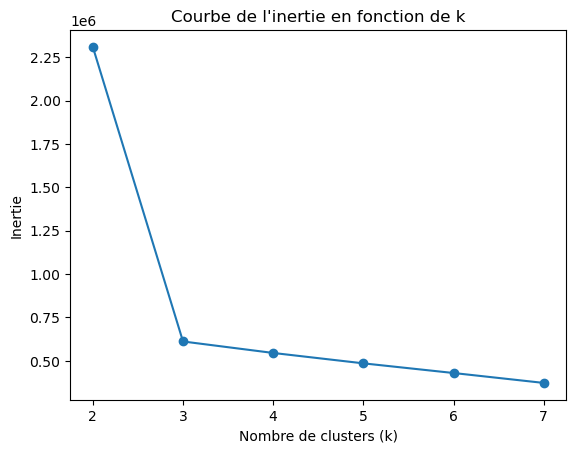

In [6]:
plt.plot(k_valeurs, inertie, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.title("Courbe de l'inertie en fonction de k")
plt.show()

###### Remarque
Inertie : L'inertie est une mesure couramment utilisée pour évaluer la qualité d'une solution de clustering. Elle mesure la dispersion des points de données à l'intérieur de chaque cluster. On observe la bonne solution au niveau de la cassure de la courbe d'inertie en fonction de k. 

Score de regroupement et de séparation : voir partie 2.1

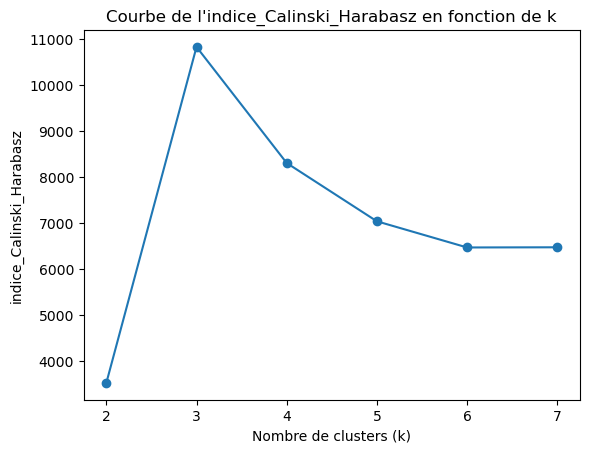

1698585263.024916 1698585263.089689
64.7730827331543


In [7]:
k_valeurs = range(2, 8)
inertie = []
indice_Calinski_Harabasz = []

tps1 = time.time()
for k in k_valeurs : 
    model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
    model.fit(datanp)
    
    labels = model.labels_
    indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))
    
    
tps2 = time.time()
runtime=(tps2 - tps1)*1000
plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("indice_Calinski_Harabasz")
plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k")
plt.show()
print(tps1, tps2)
print(runtime)


D'après la courbe et à l'aide de l'indice Calinski Harabsz, la solution obtenue est k = 3. C'est celui qui a l'indice le plus elevé. 

Le temps de calcul : 123.1689 ms

Le score de regroupement et séparation : voir partie 2.1

## Bon dataset pour K-Means

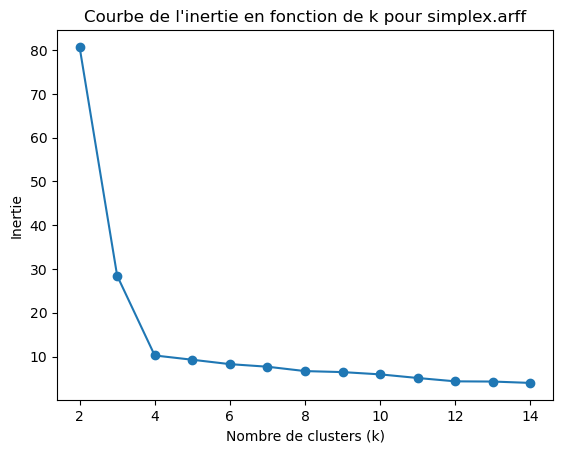

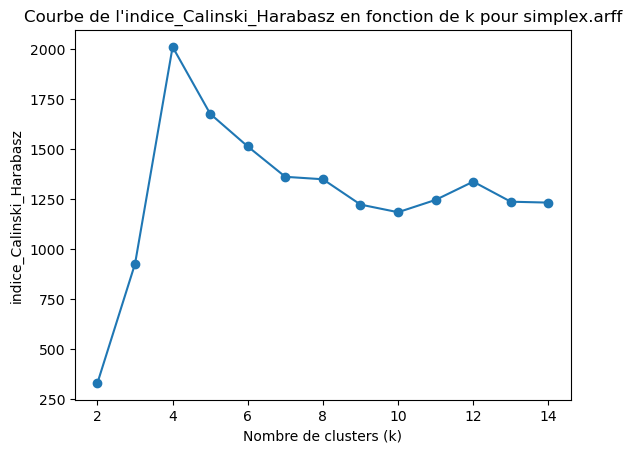

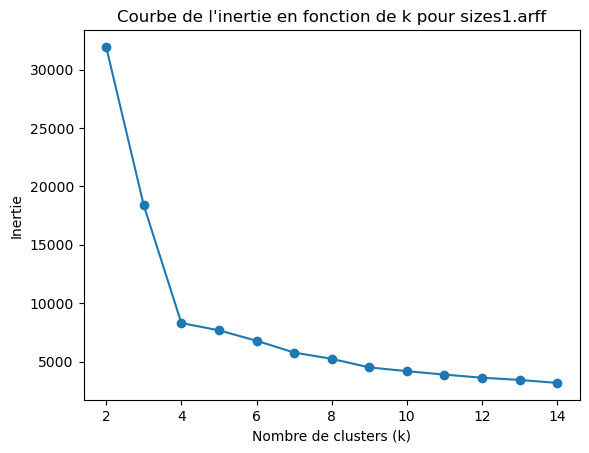

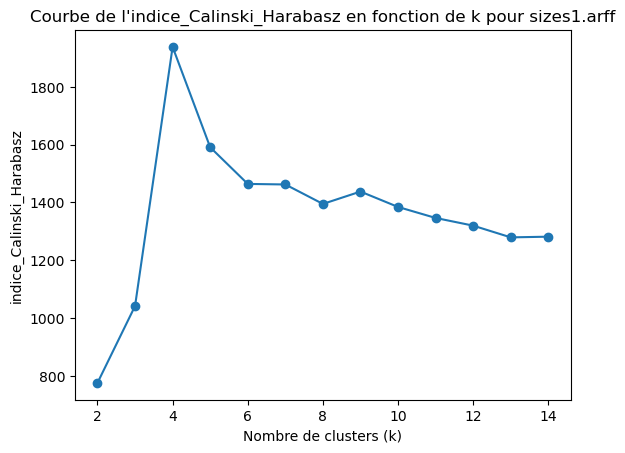

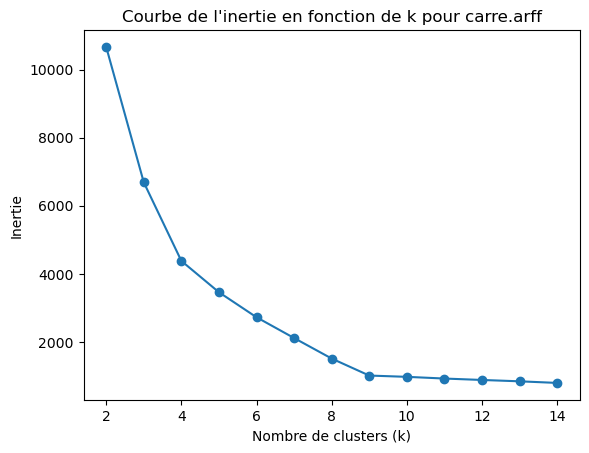

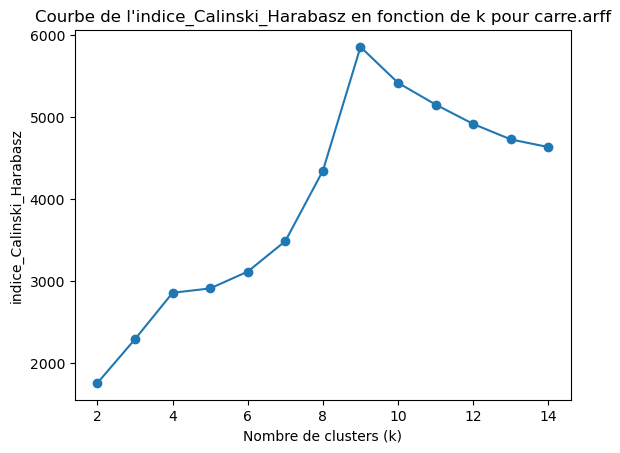

In [8]:
name = ["simplex.arff", "sizes1.arff", "carre.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()

## Mauvais Dataset pour K-Means

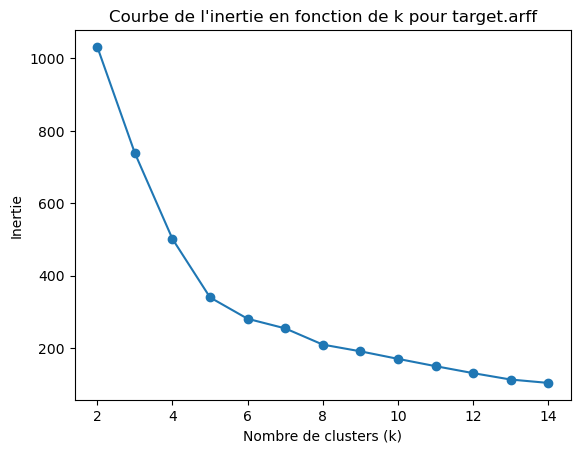

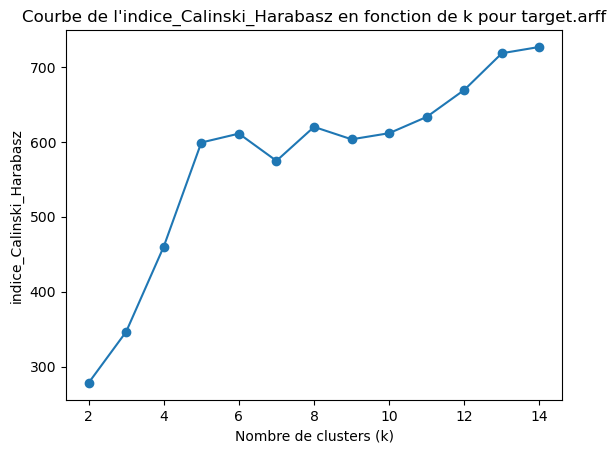

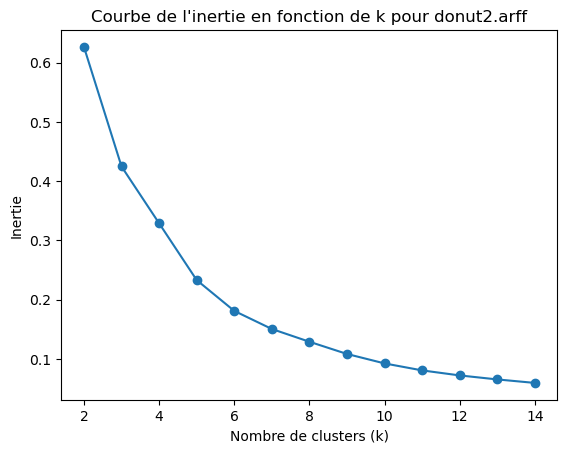

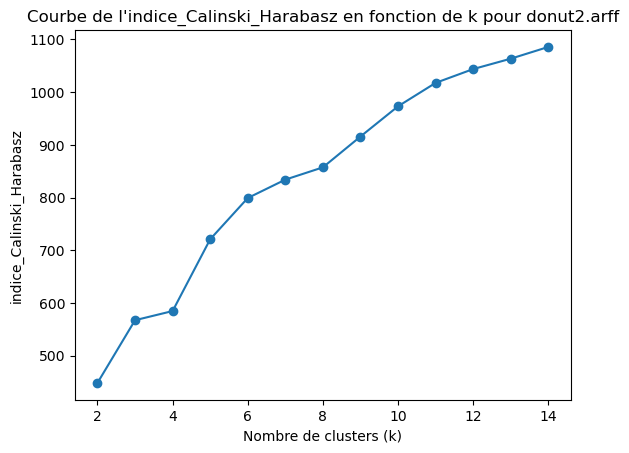

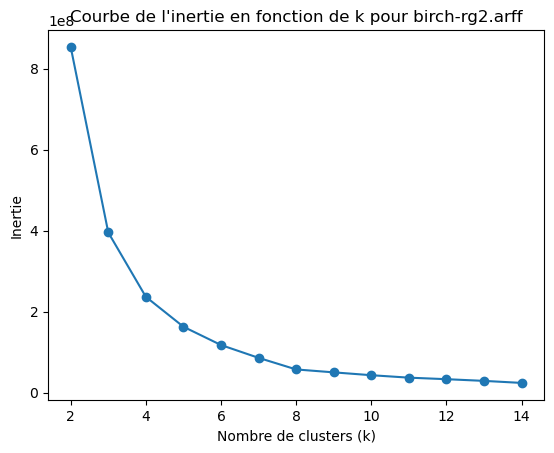

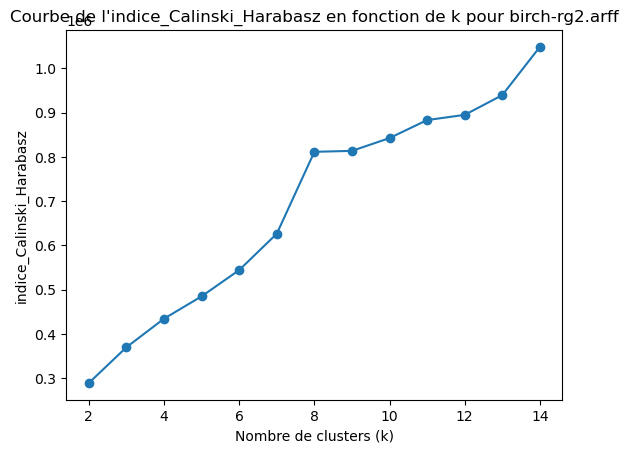

In [9]:
name = ["target.arff", "donut2.arff", "birch-rg2.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()

# K-Means version Mini-Batch

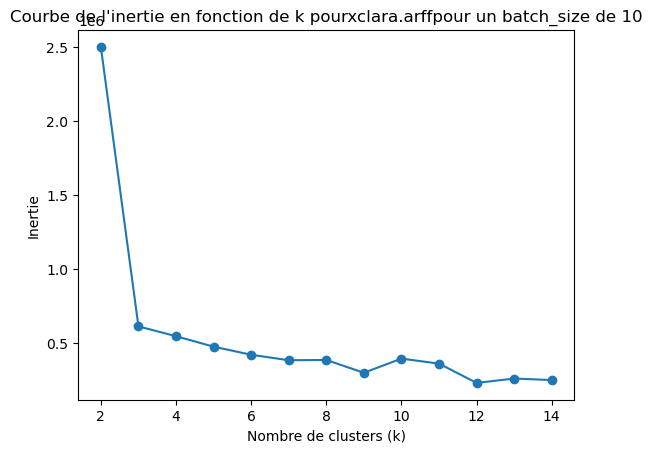

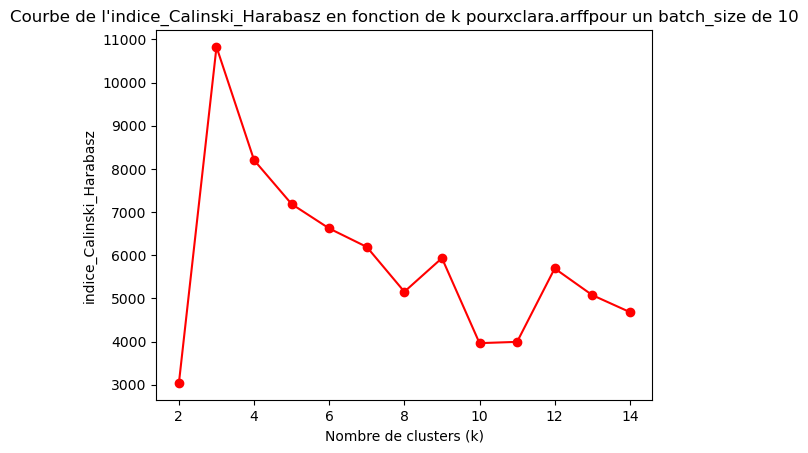

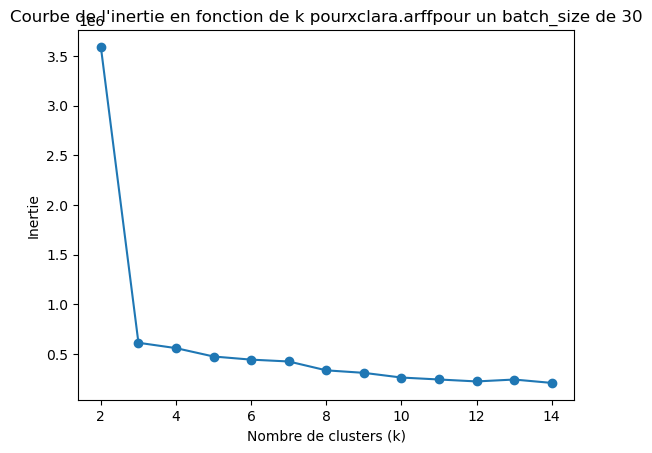

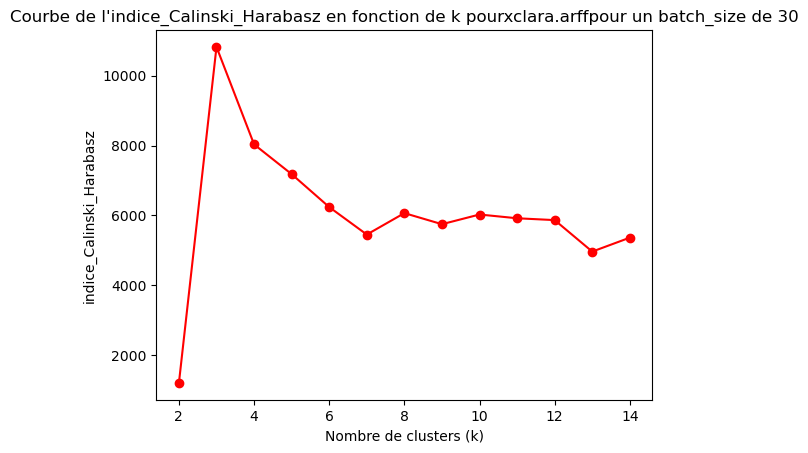

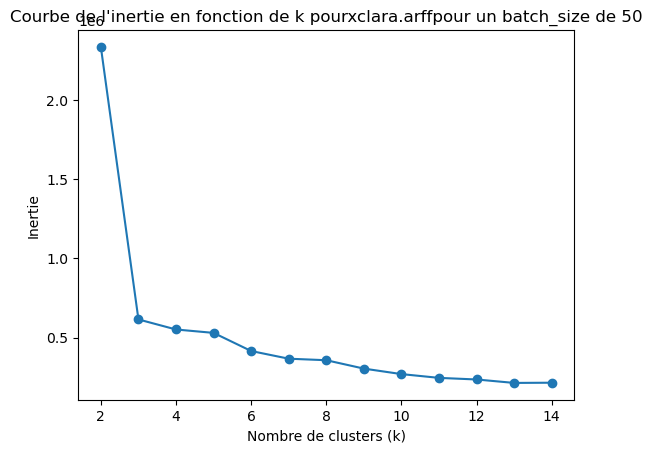

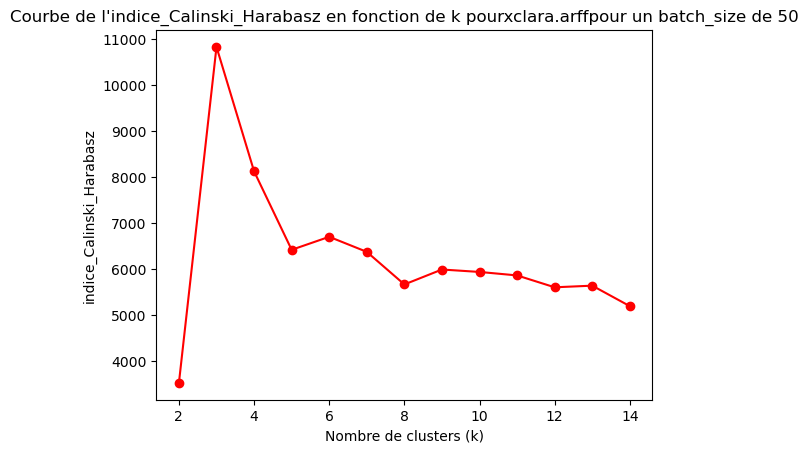

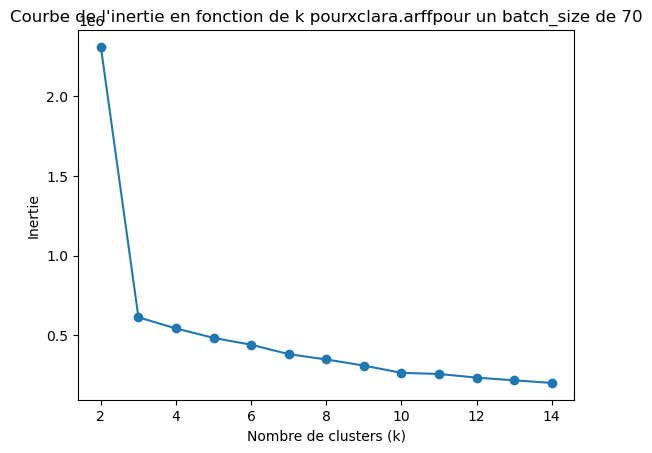

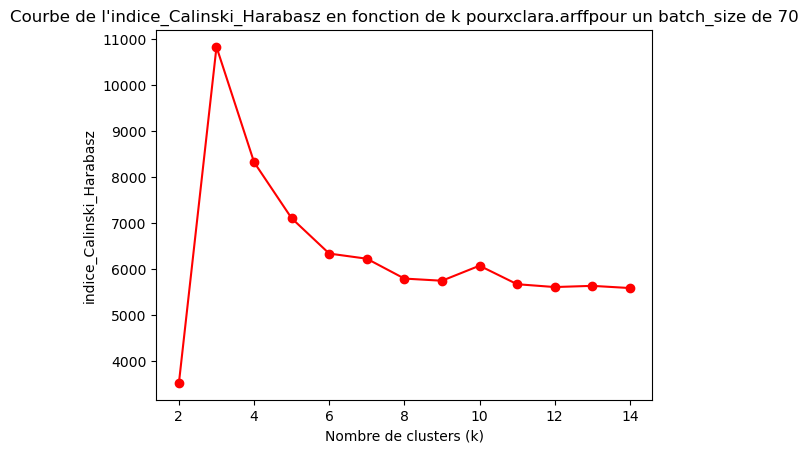

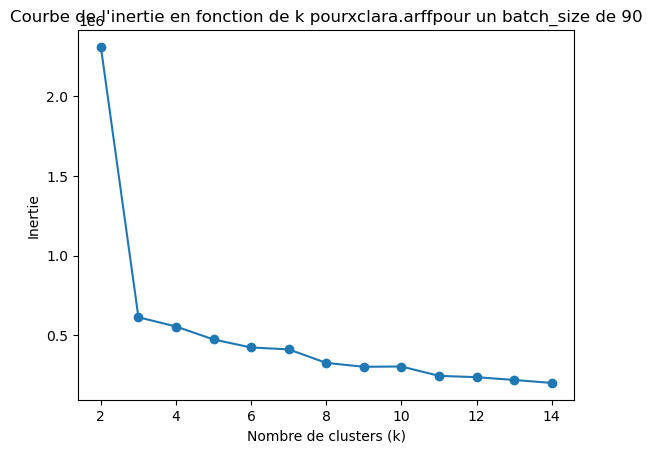

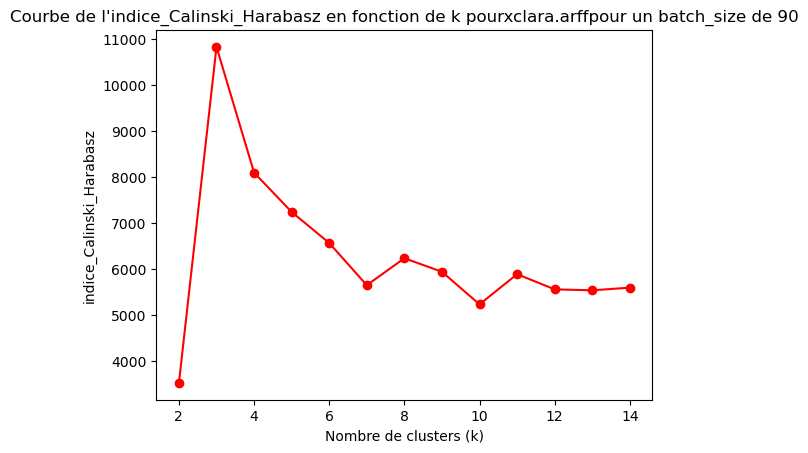

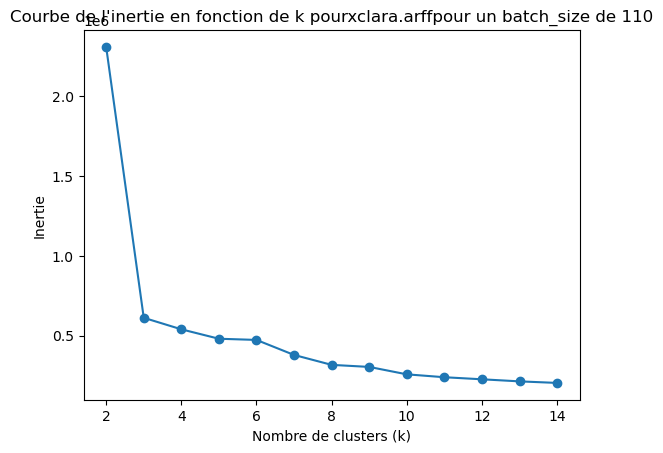

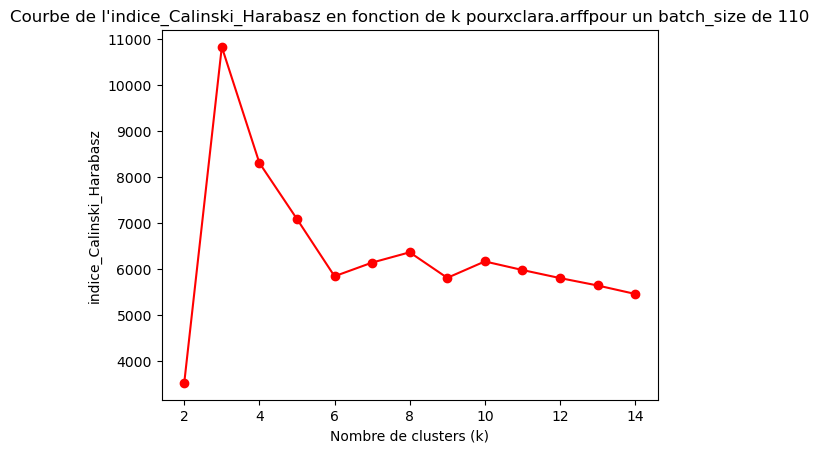

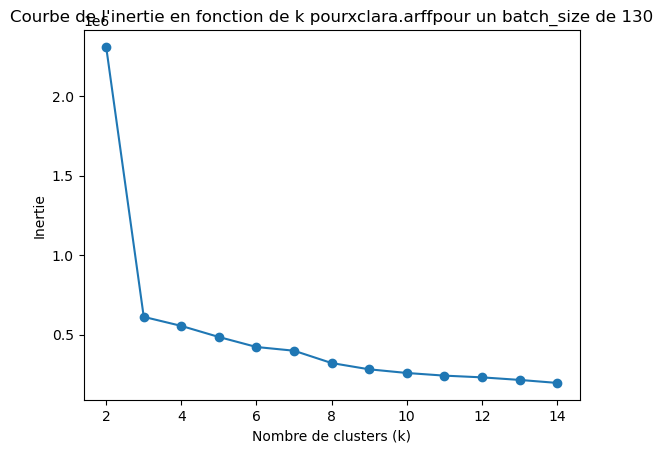

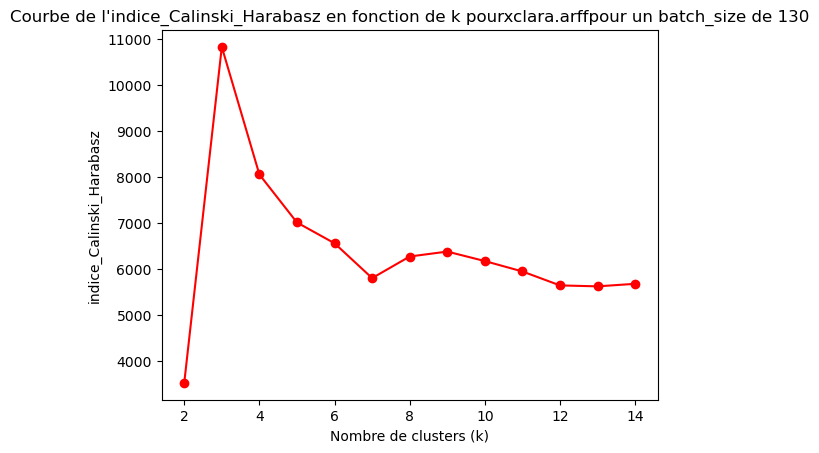

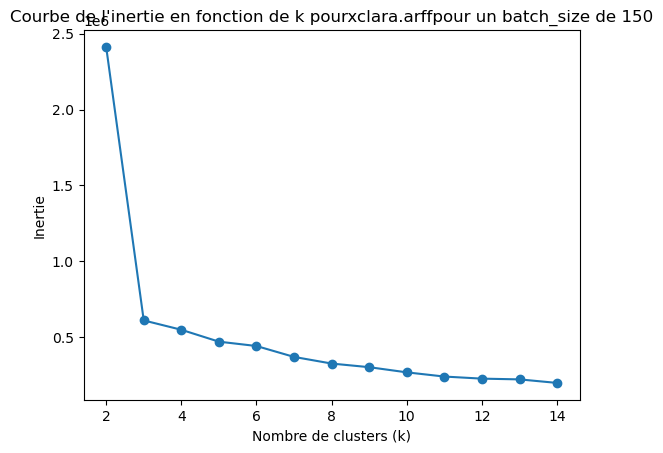

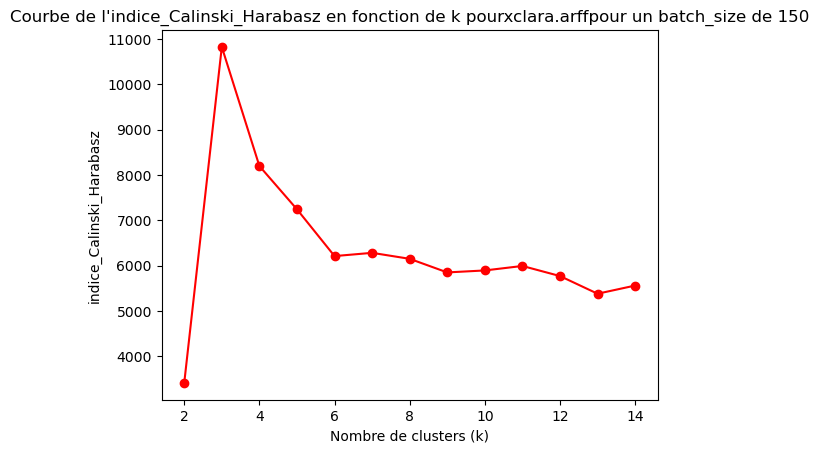

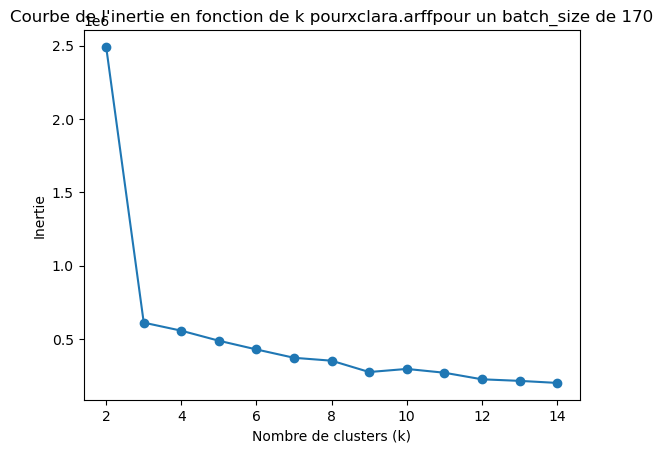

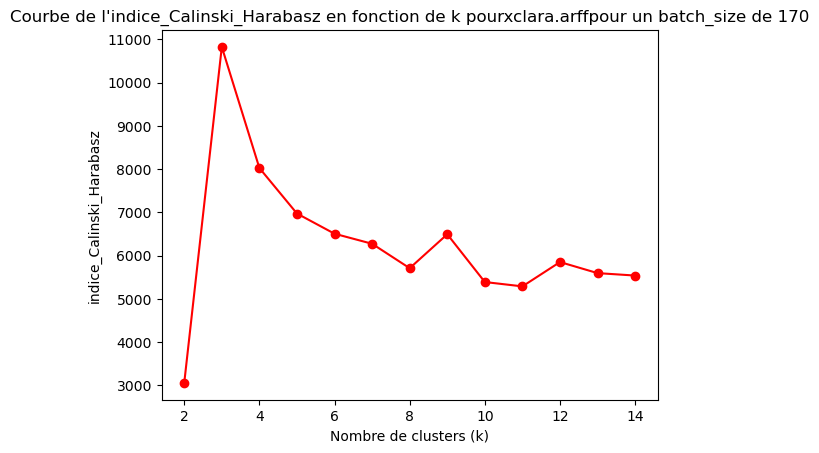

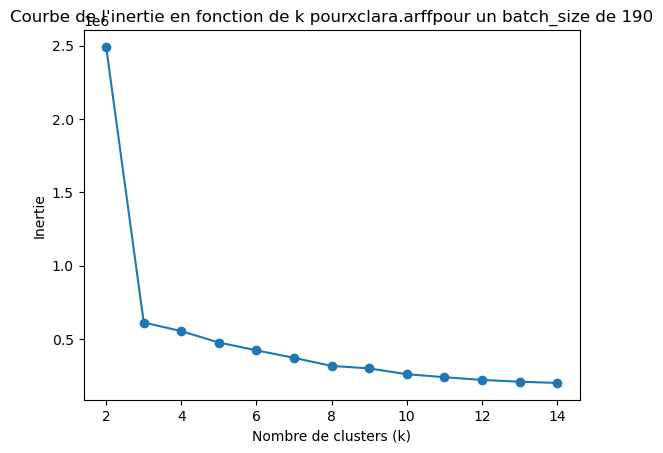

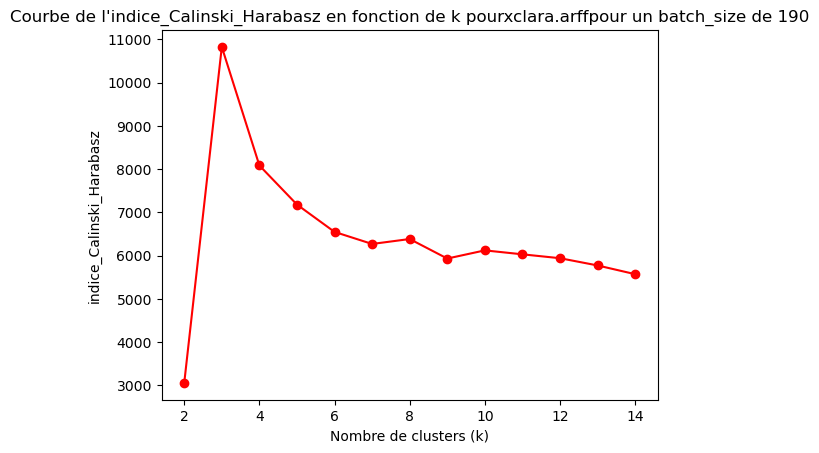

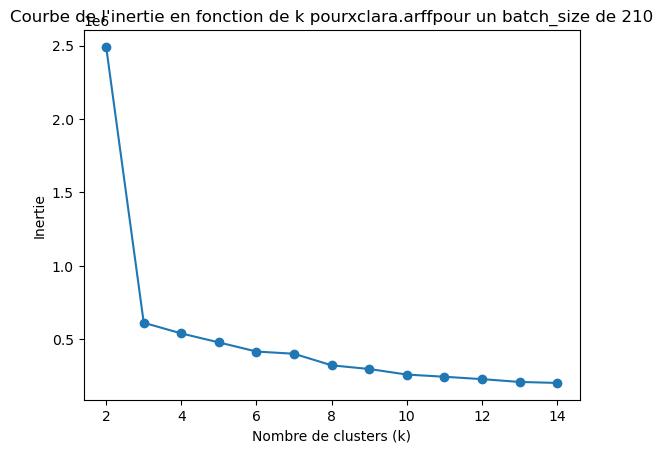

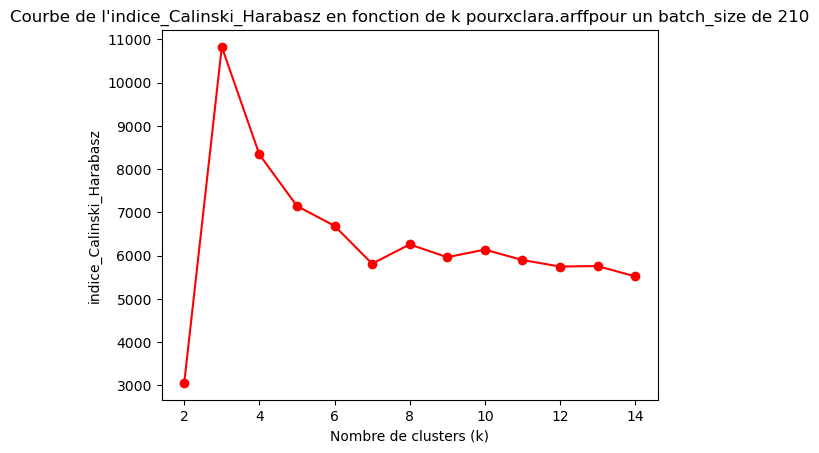

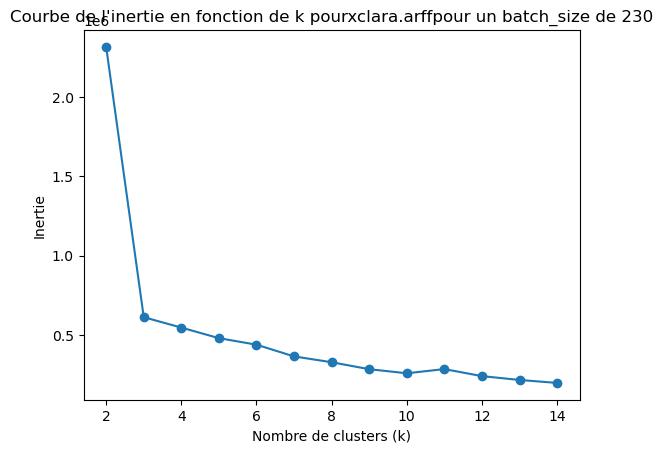

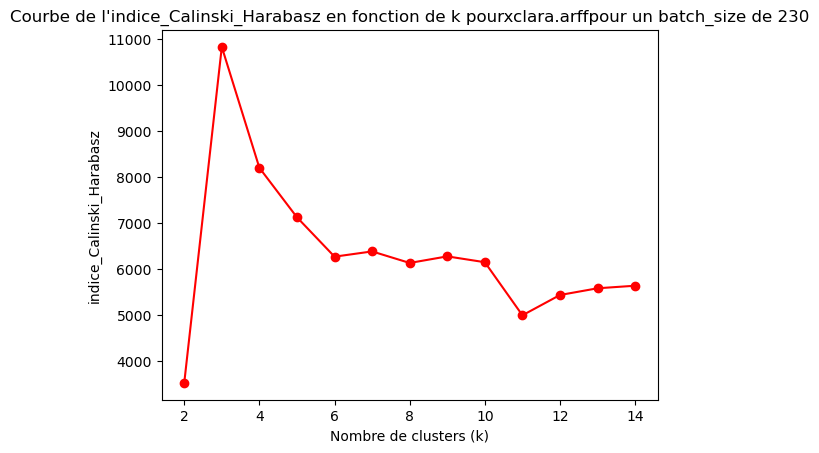

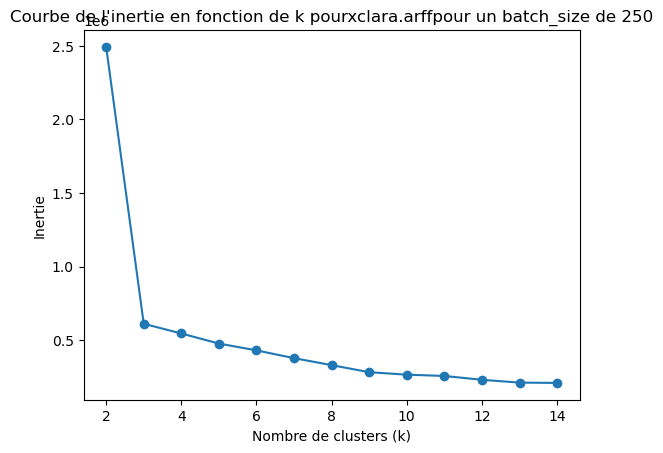

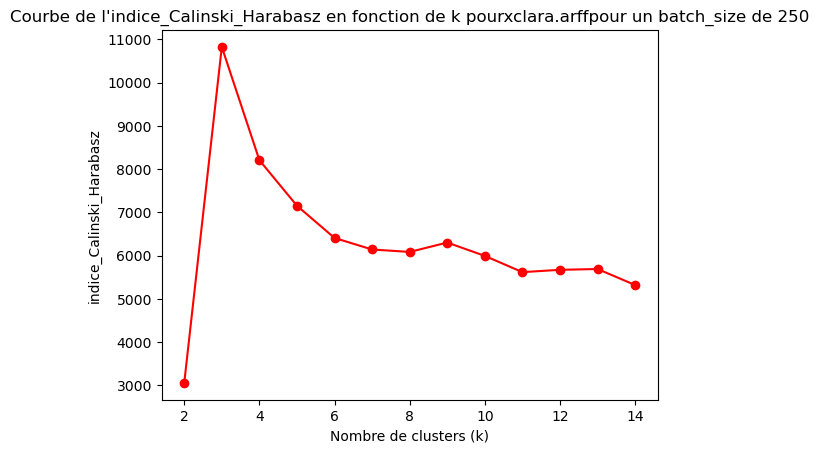

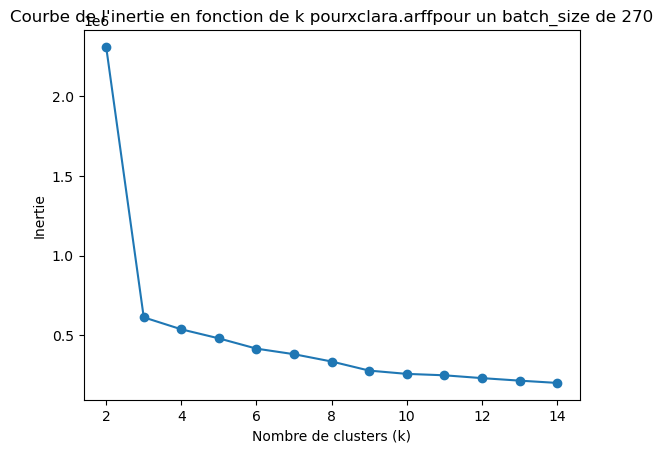

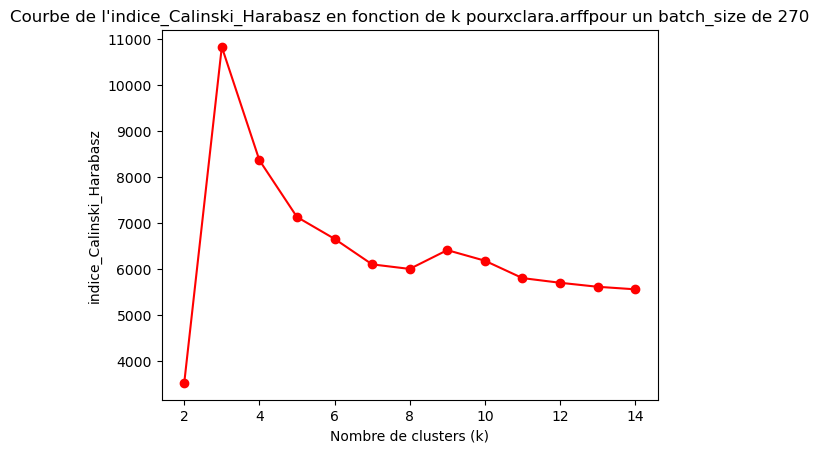

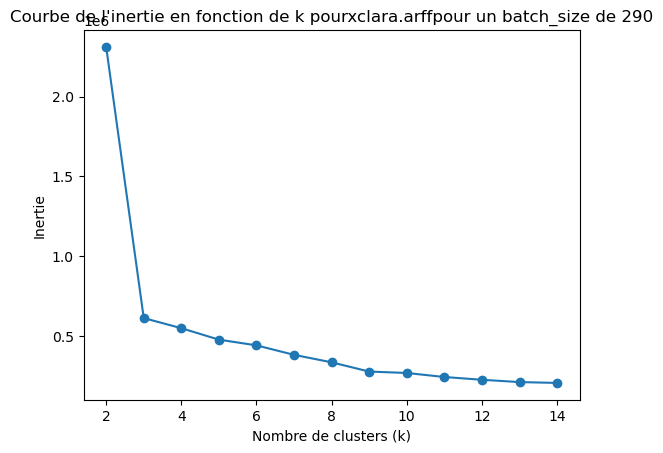

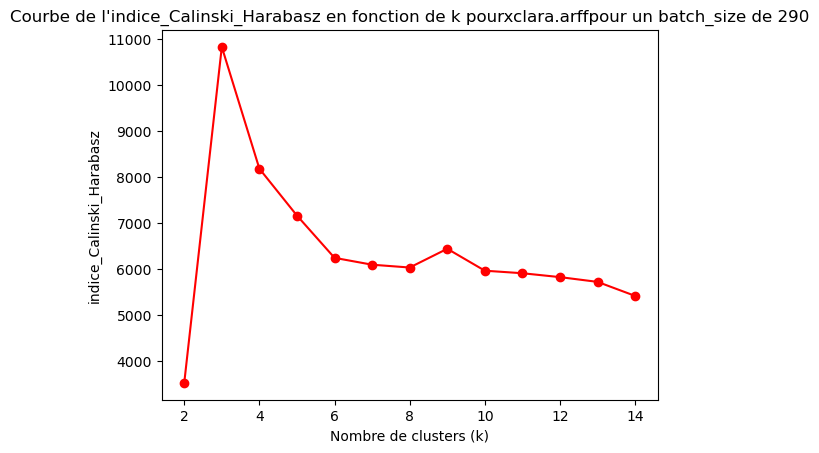

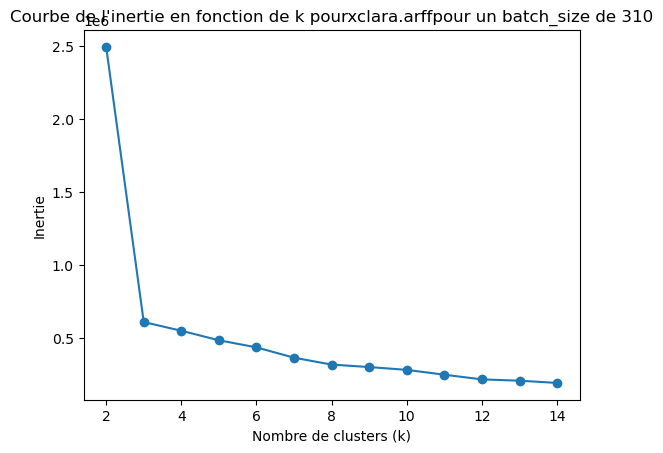

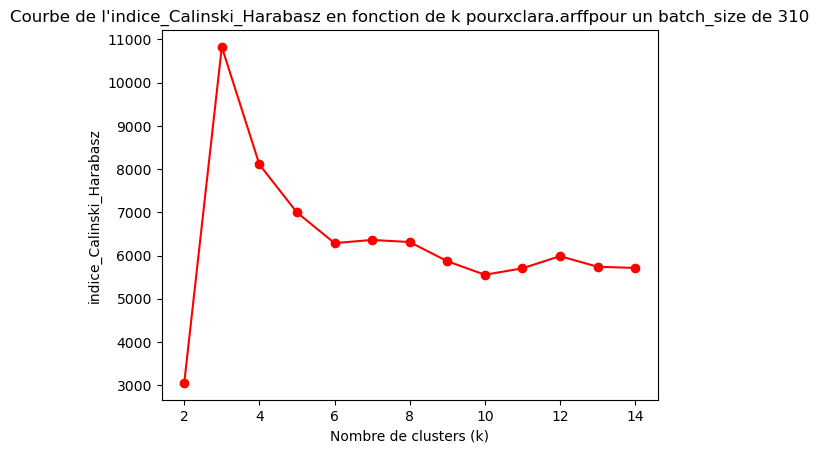

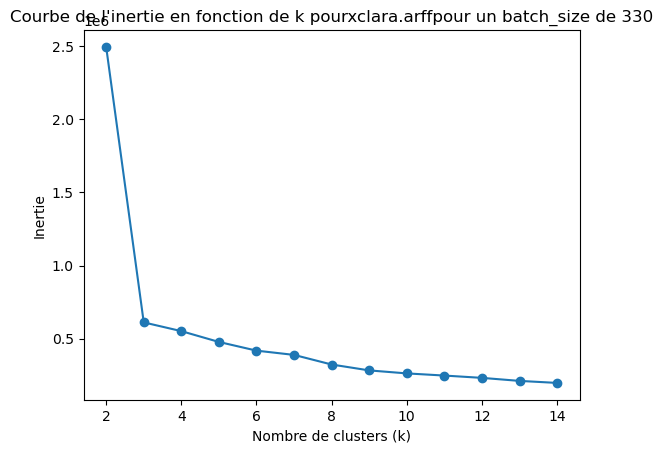

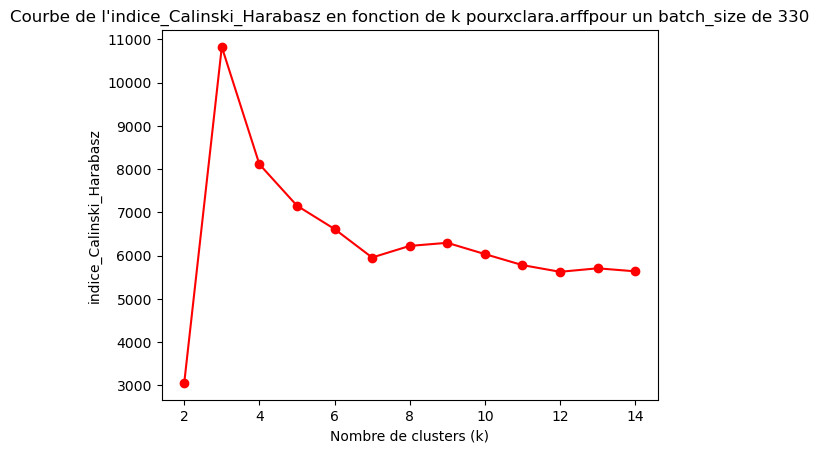

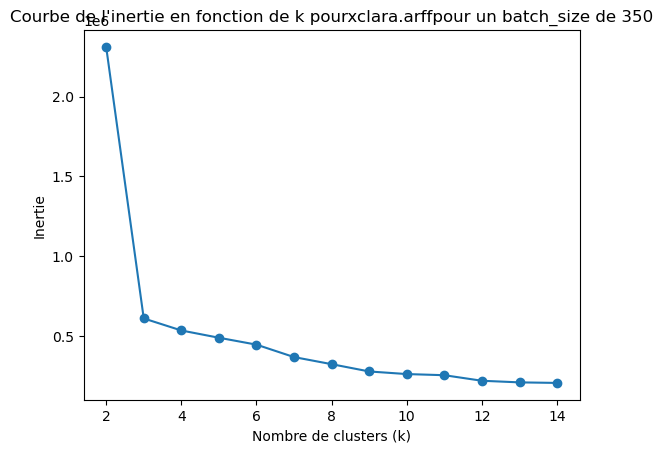

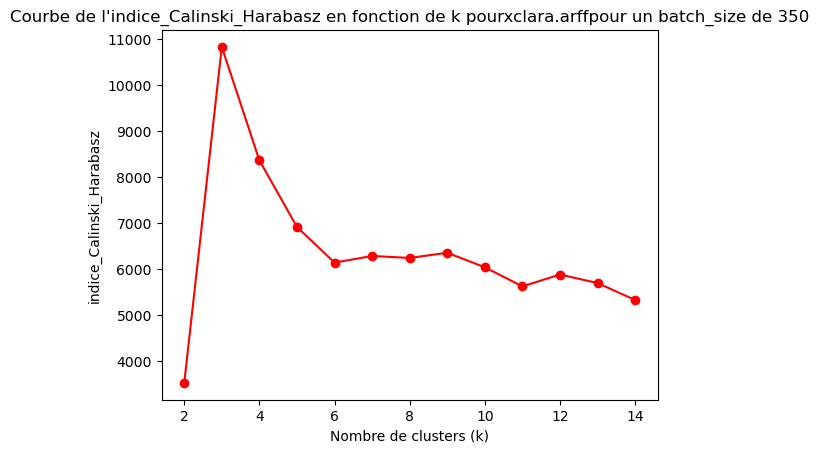

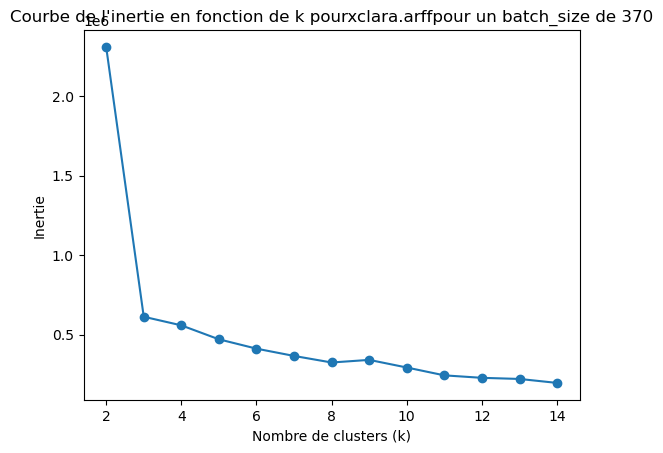

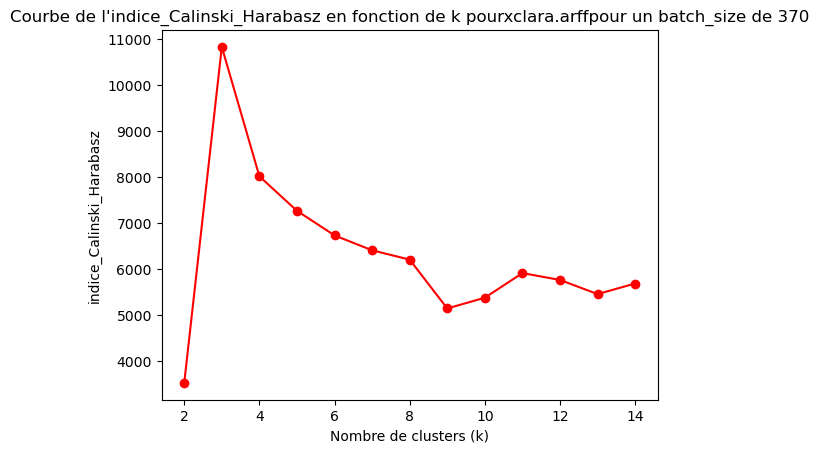

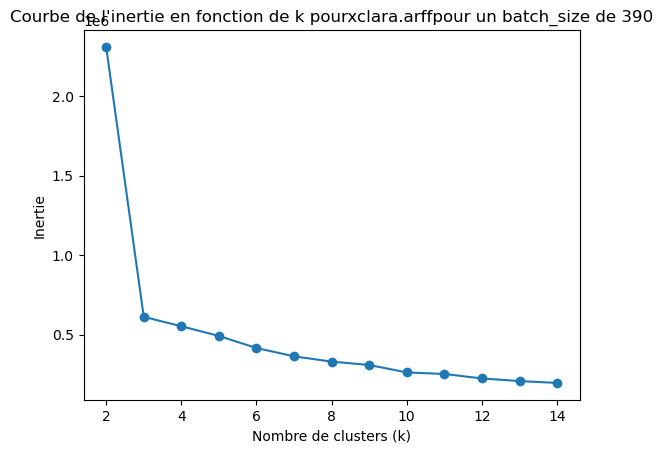

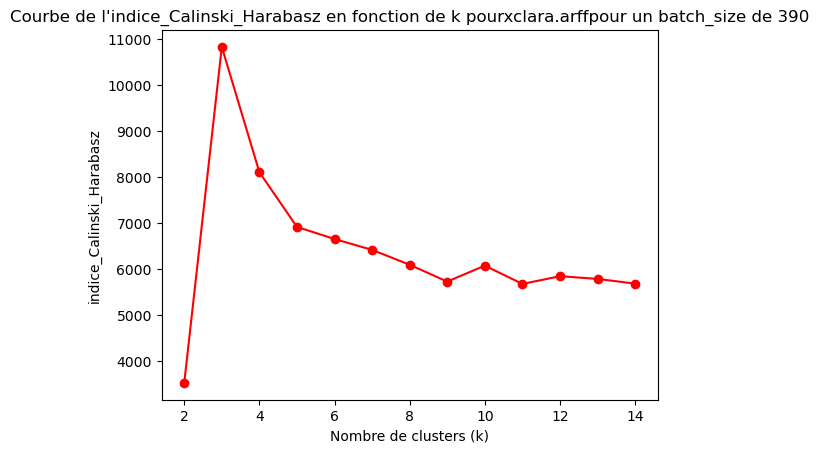

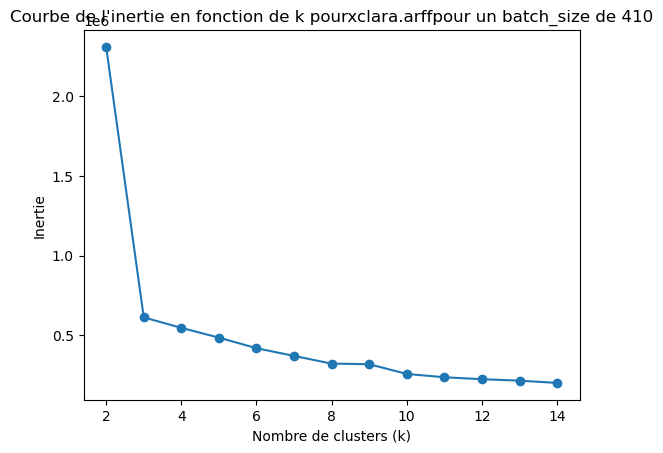

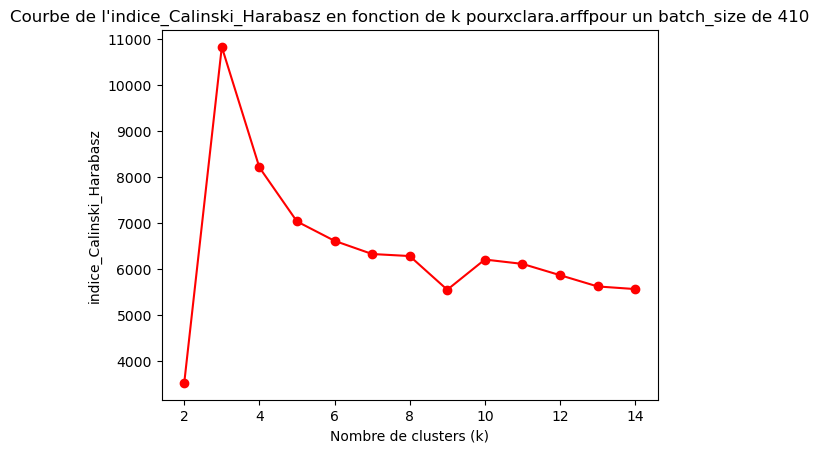

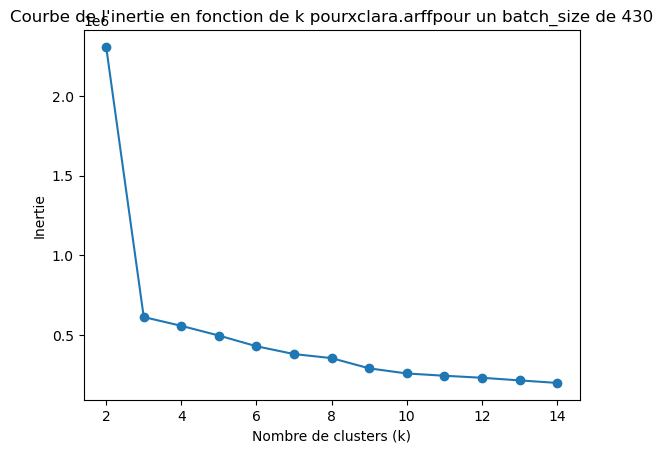

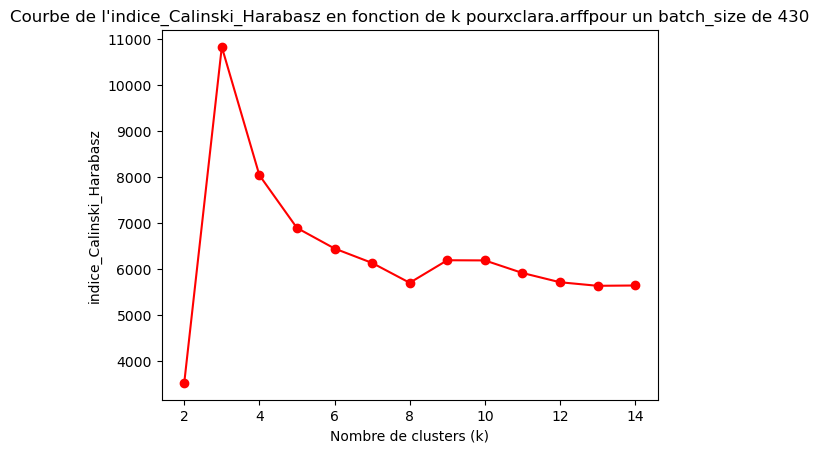

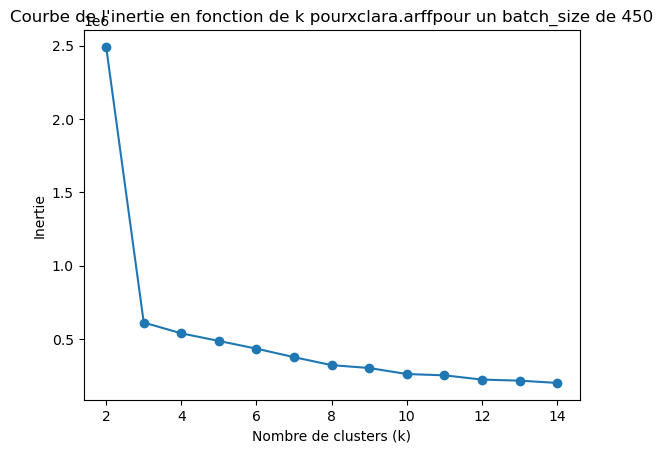

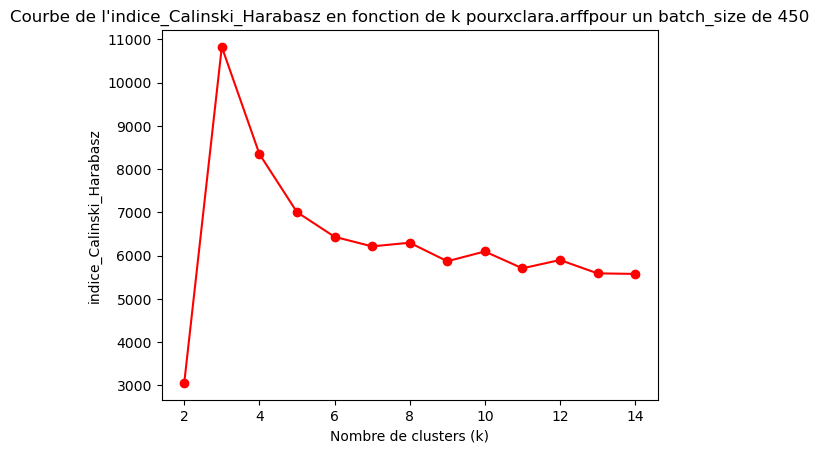

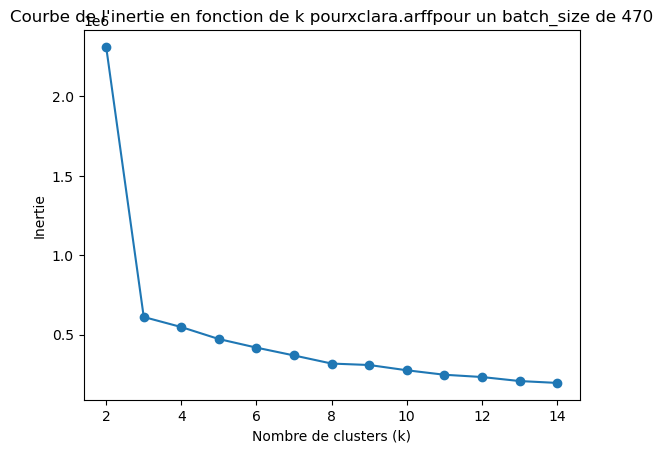

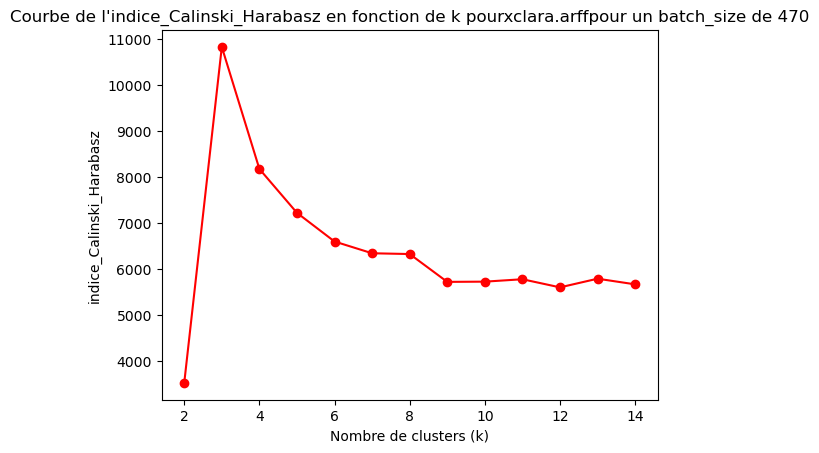

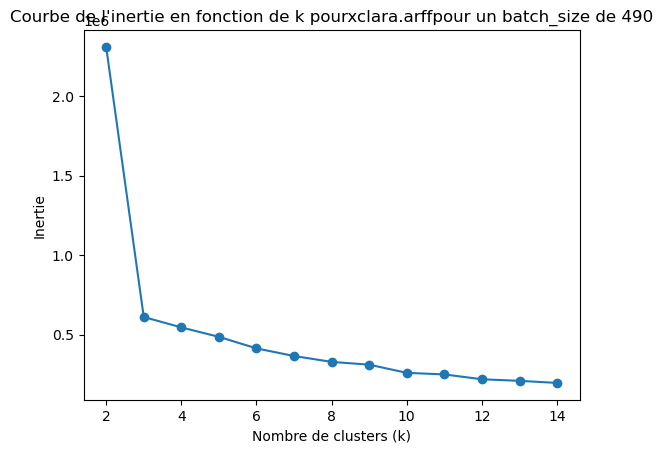

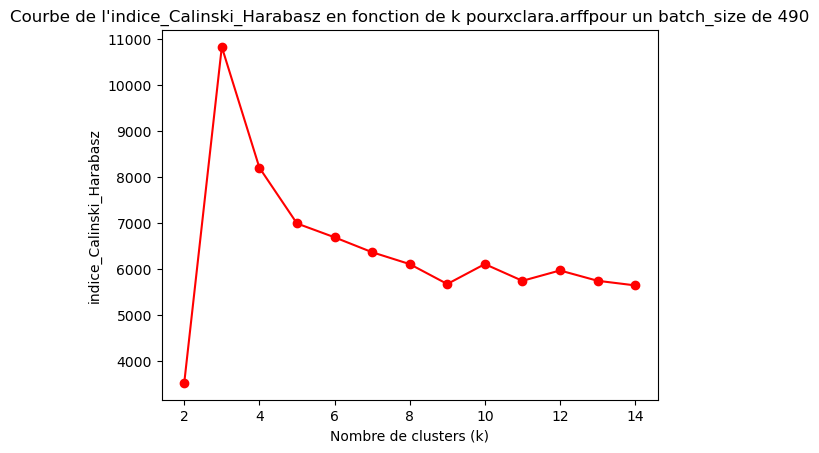

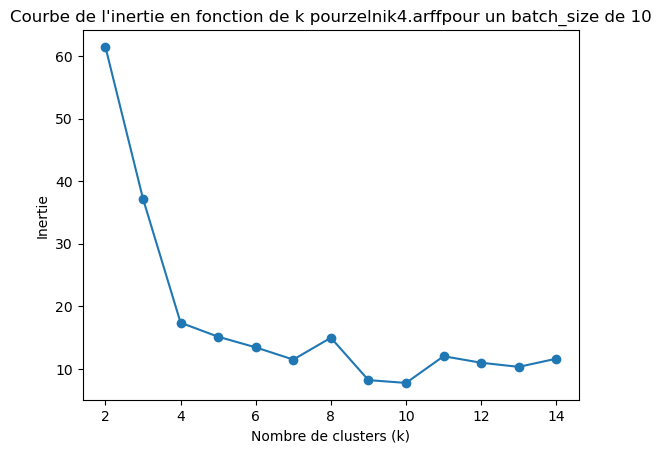

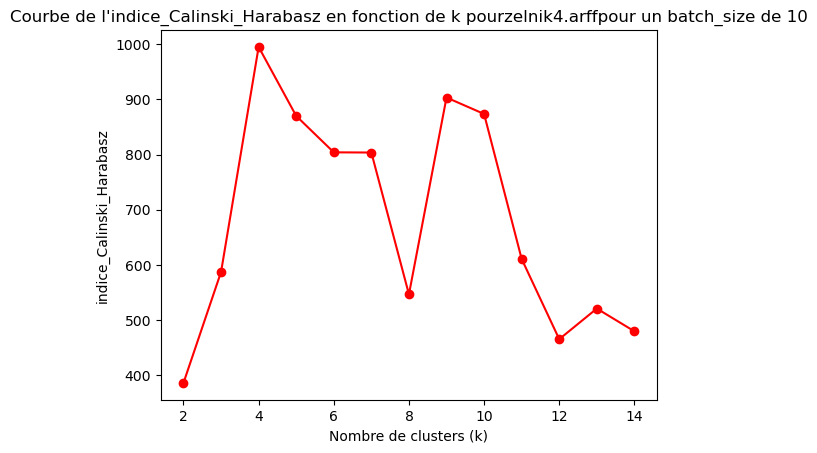

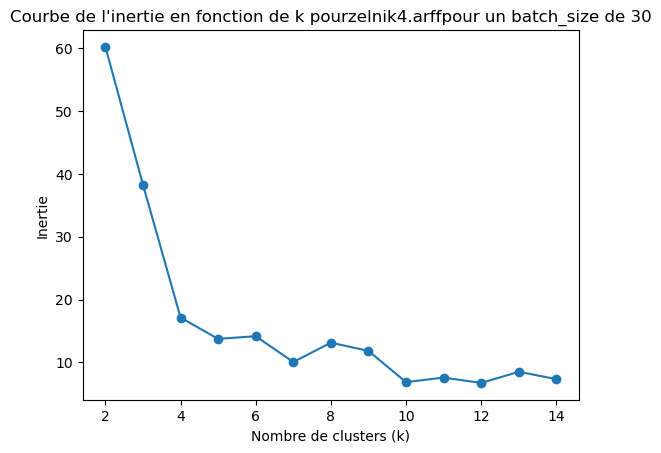

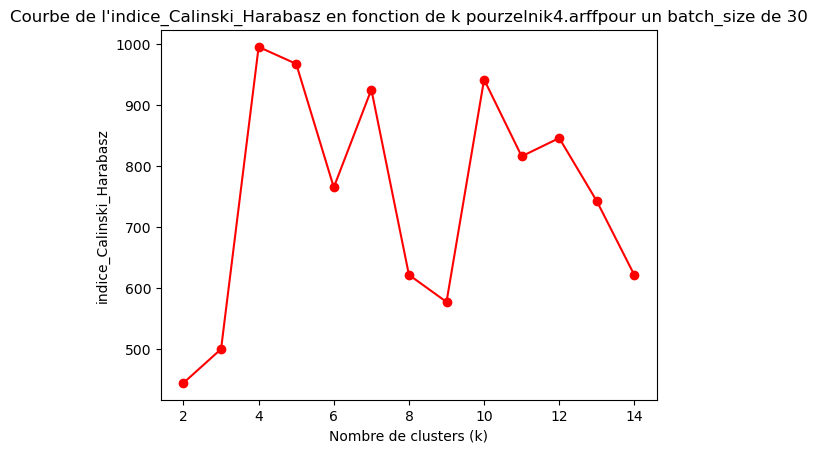

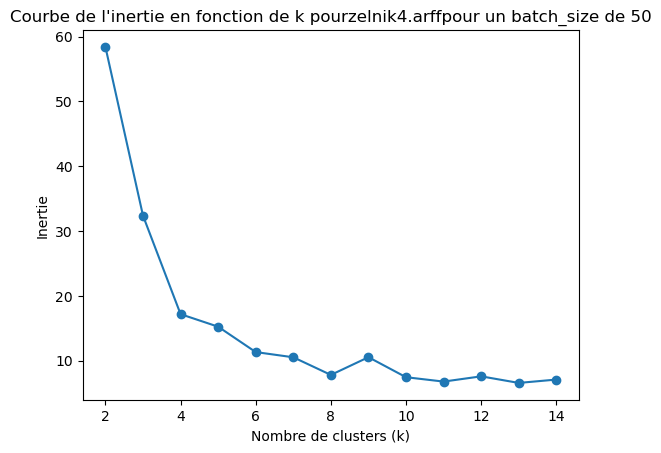

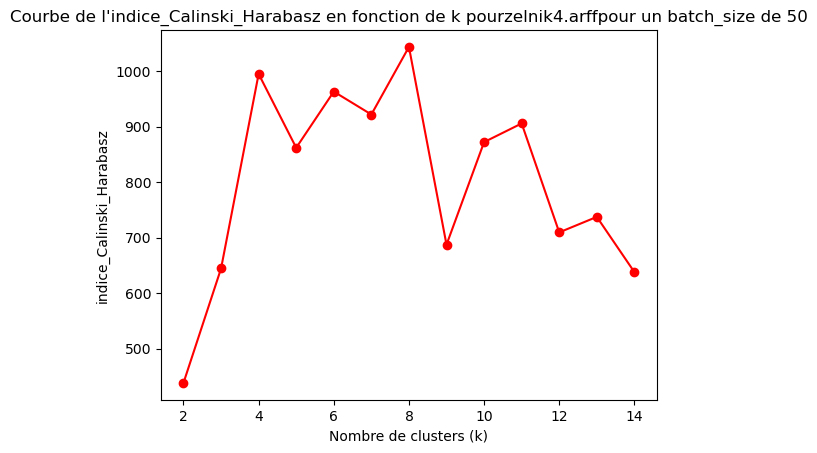

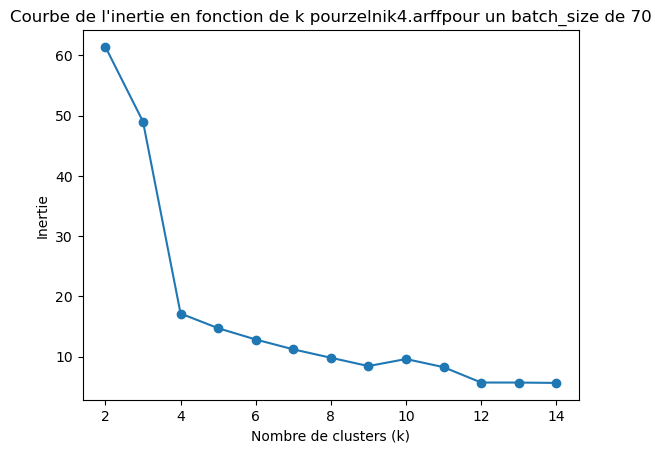

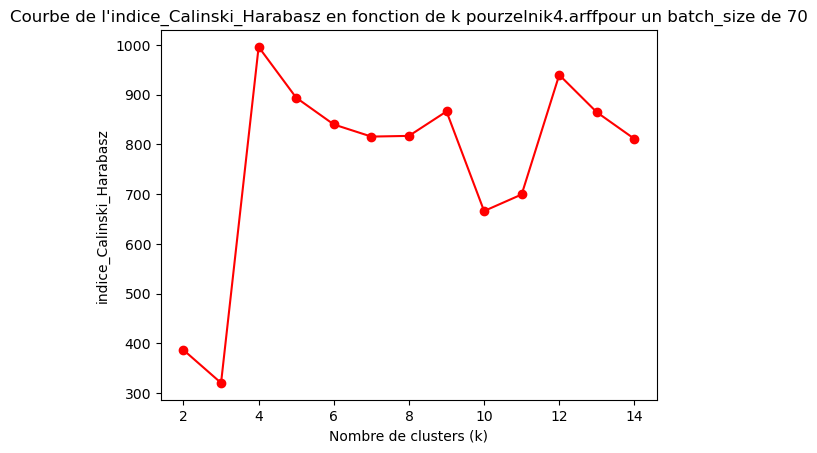

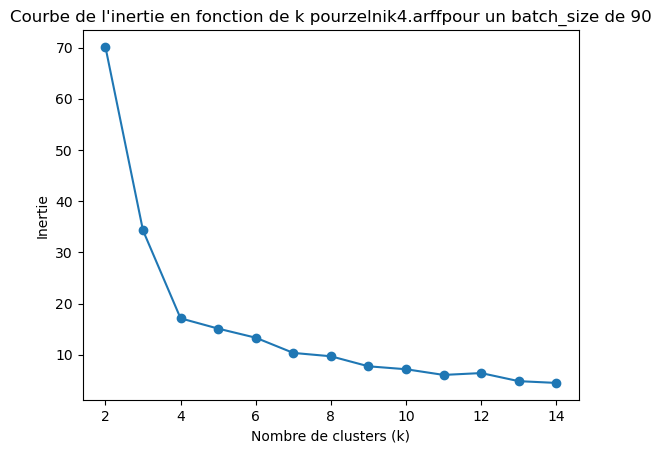

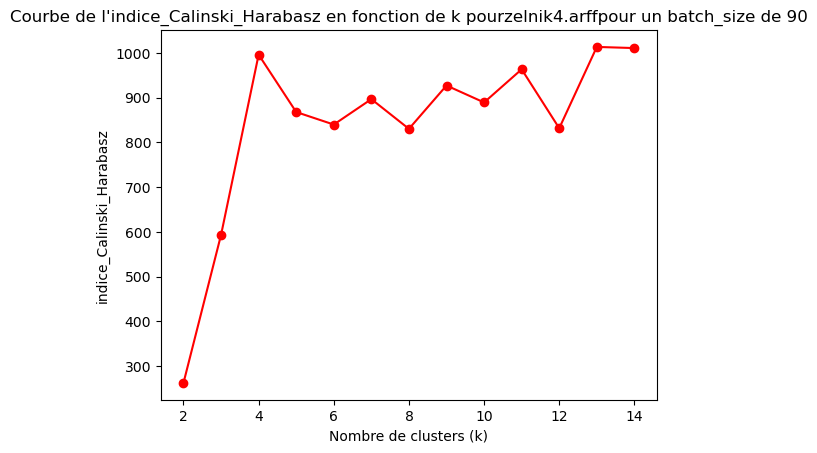

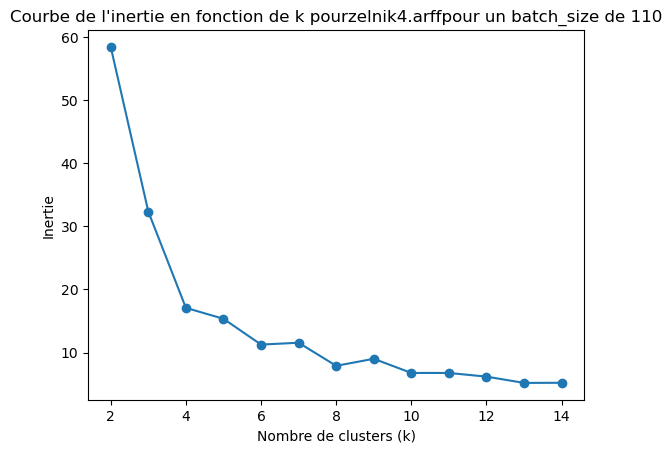

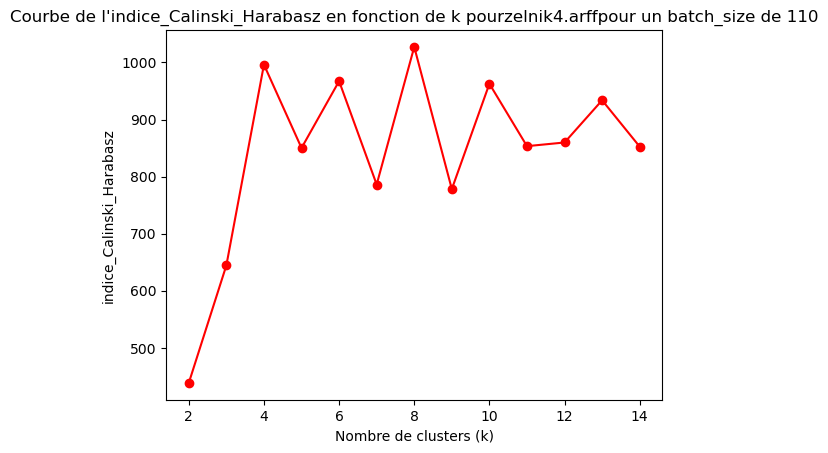

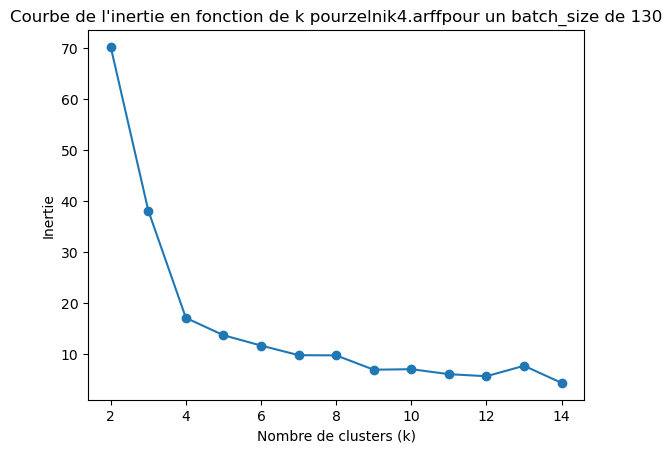

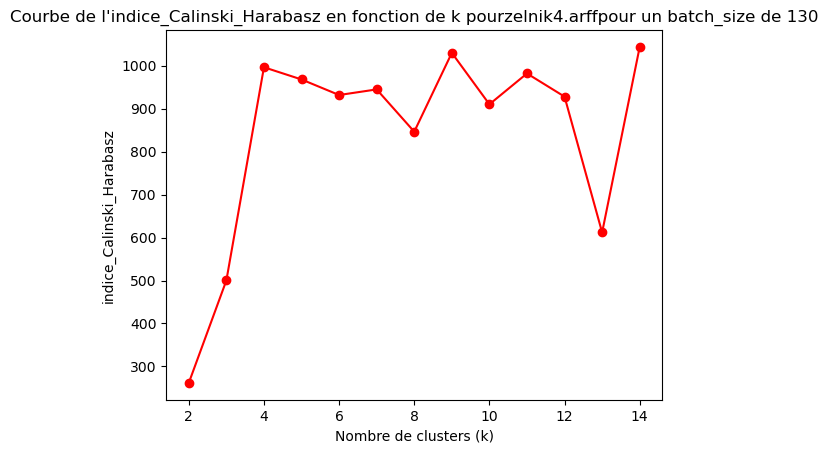

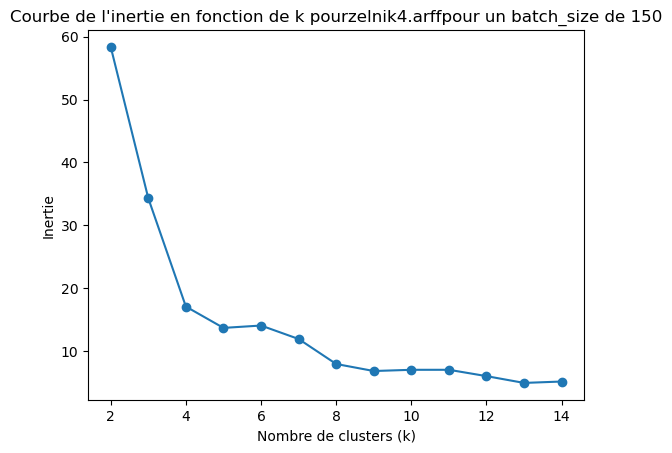

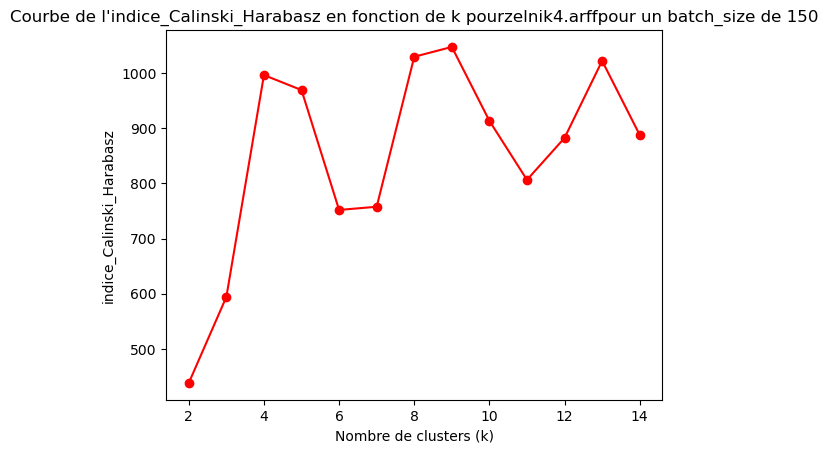

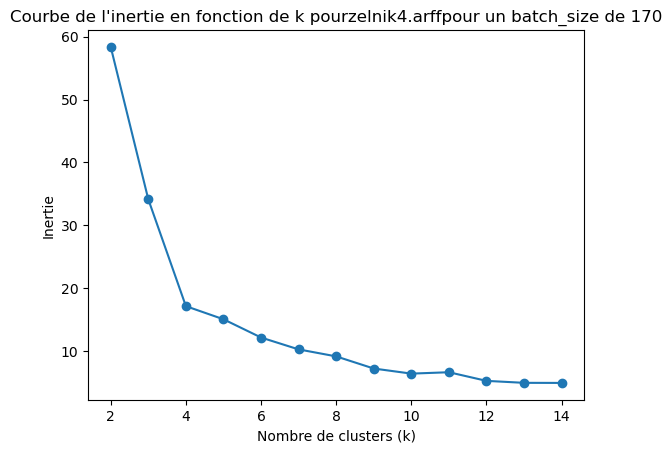

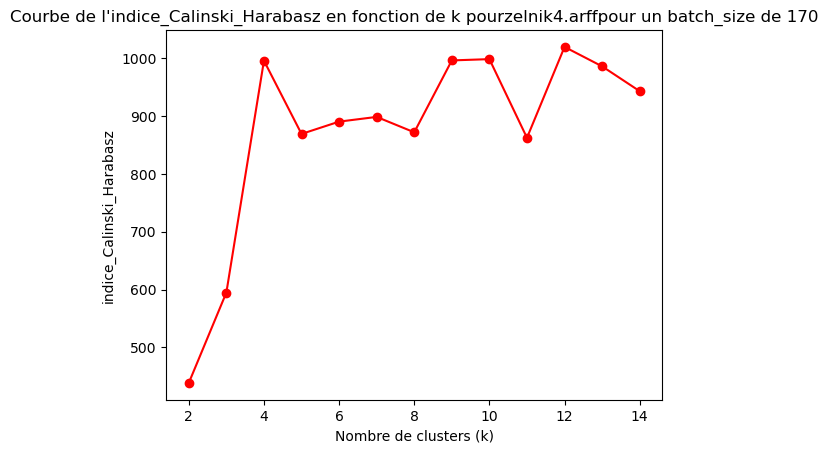

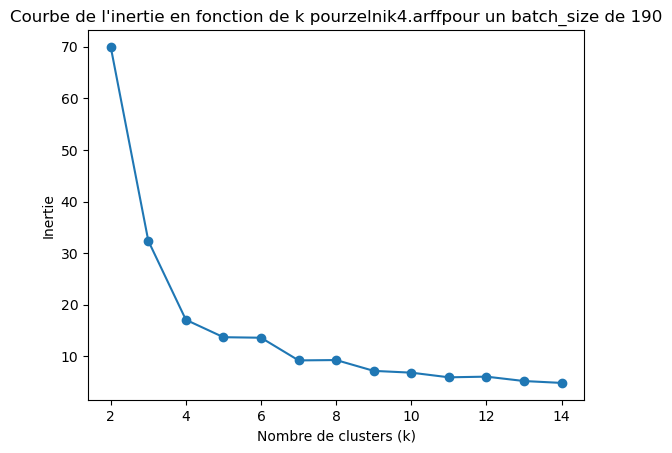

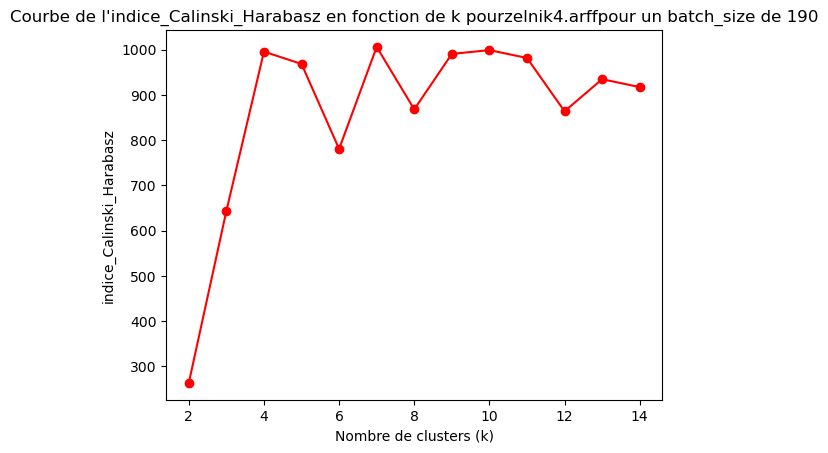

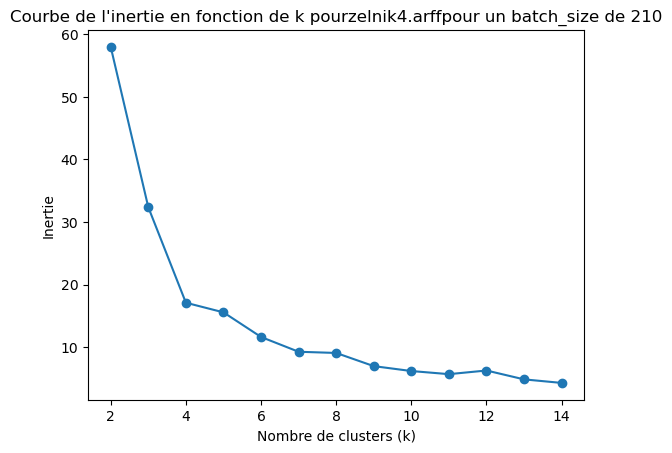

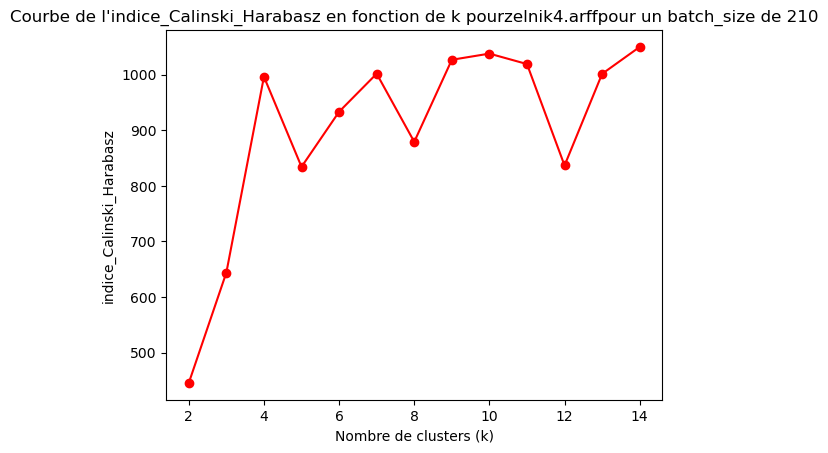

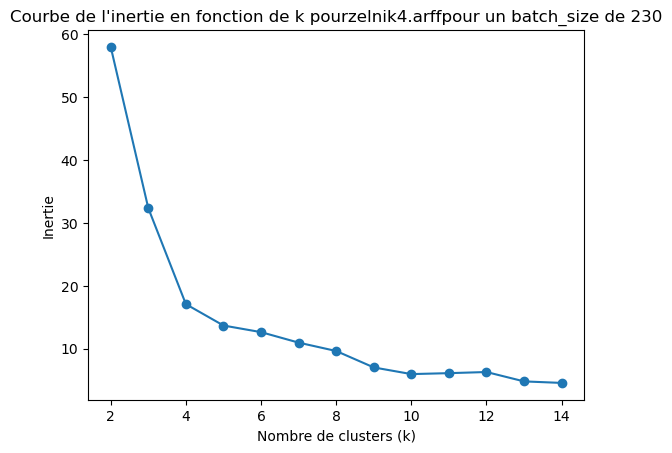

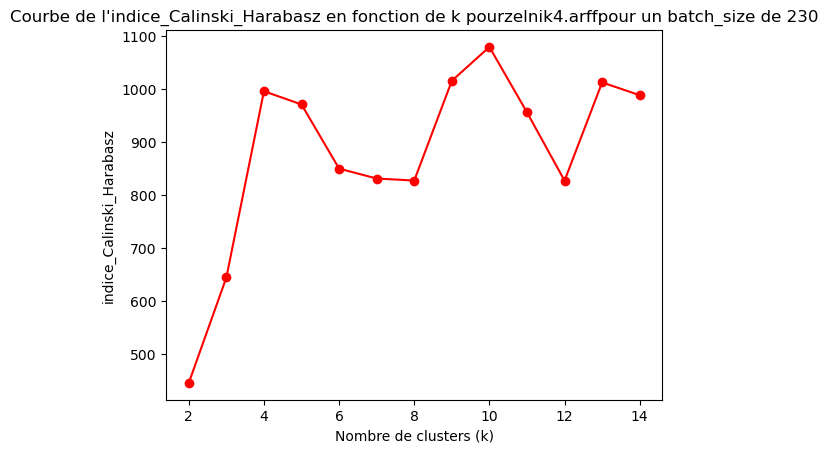

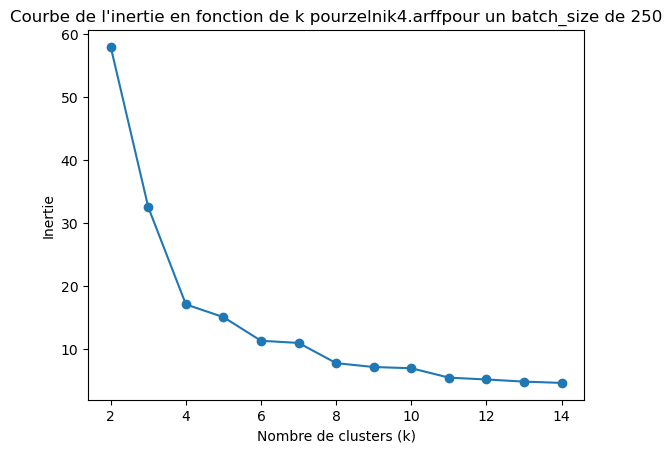

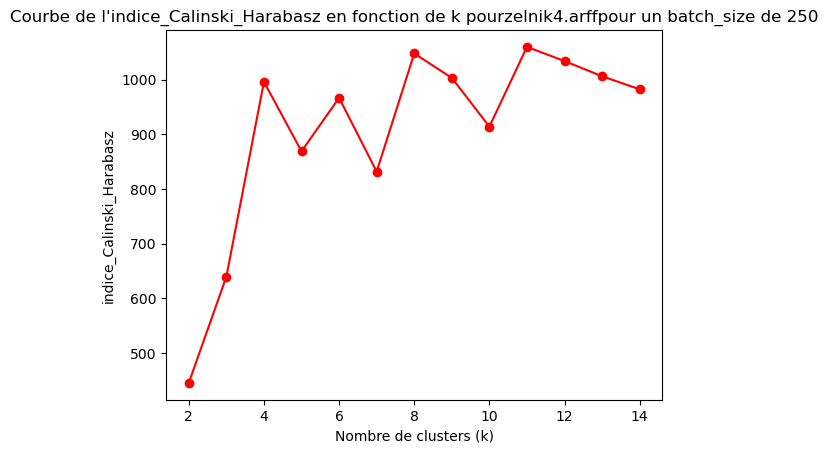

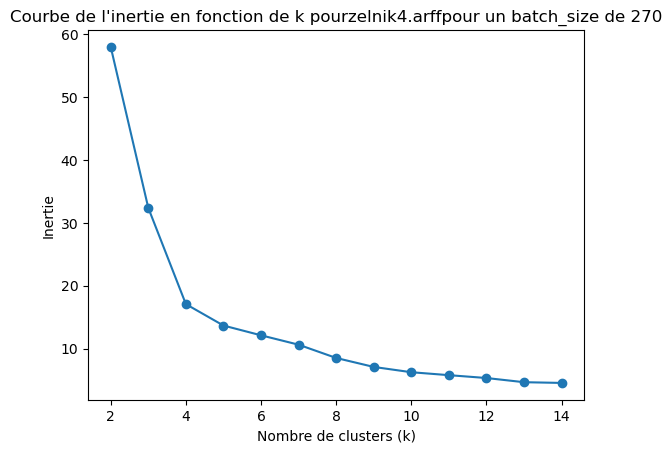

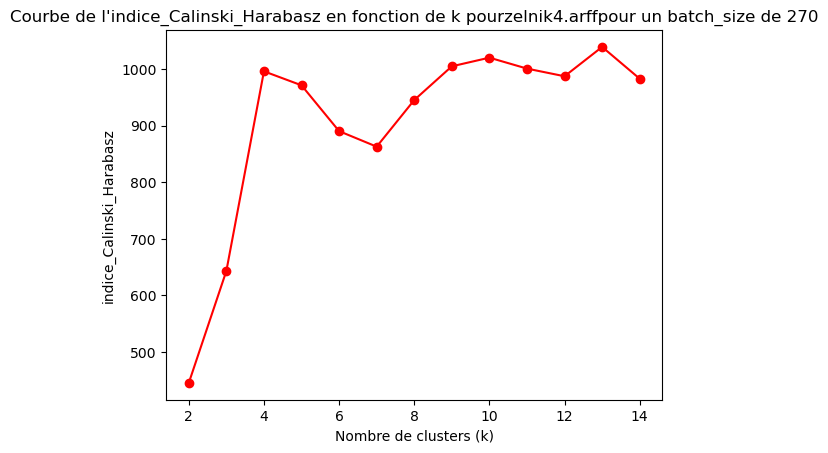

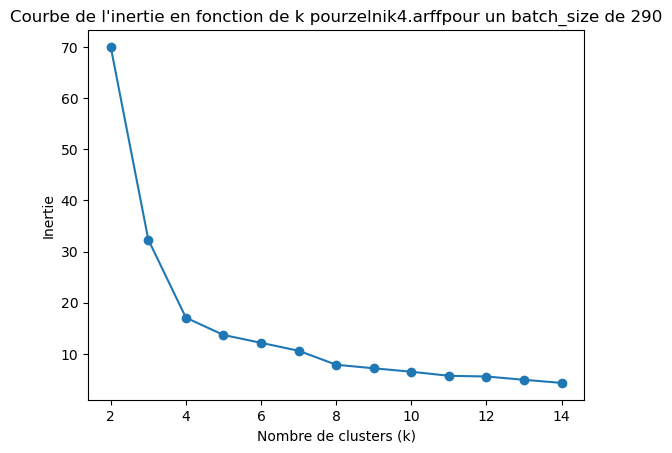

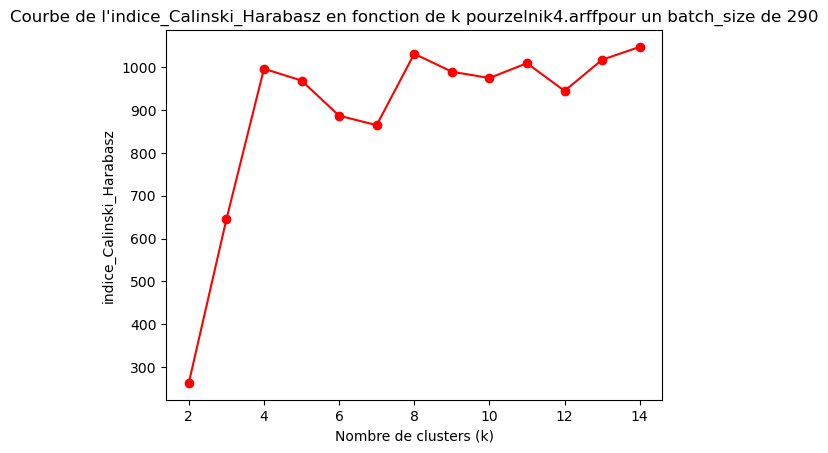

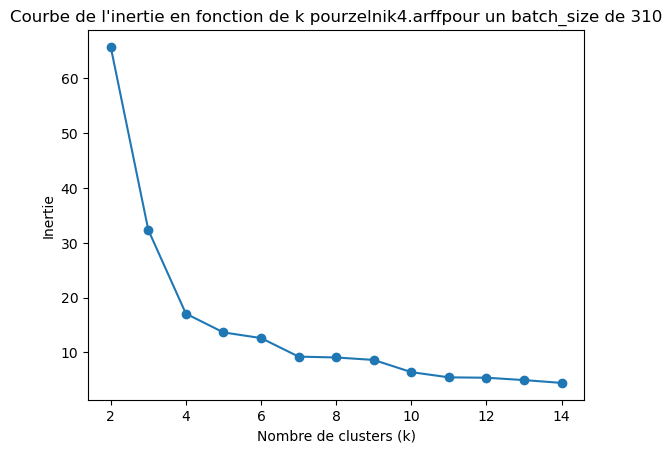

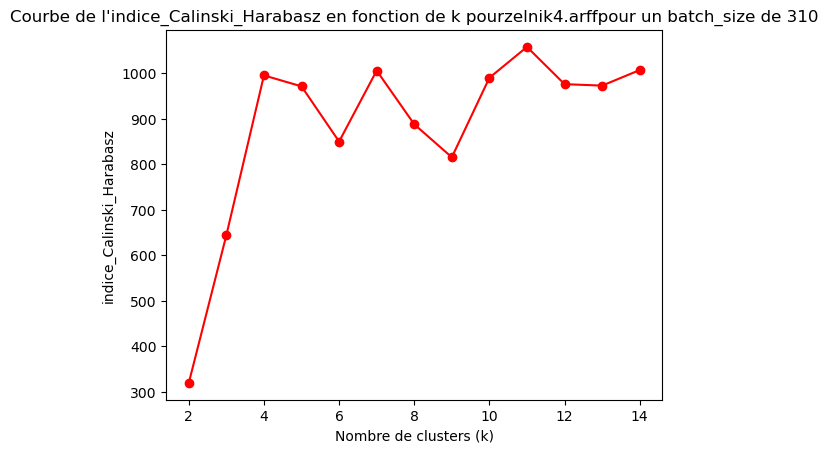

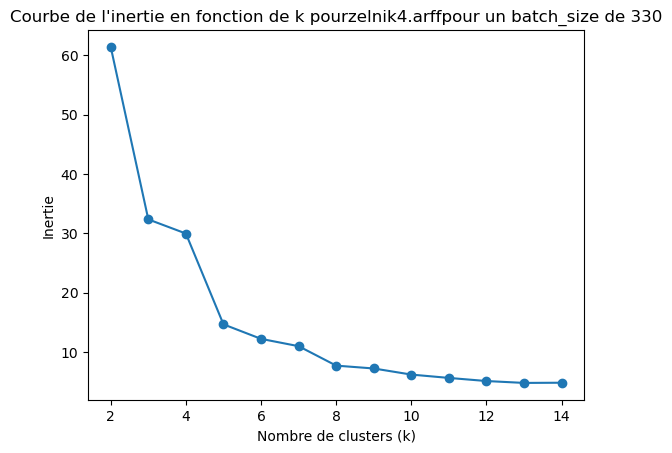

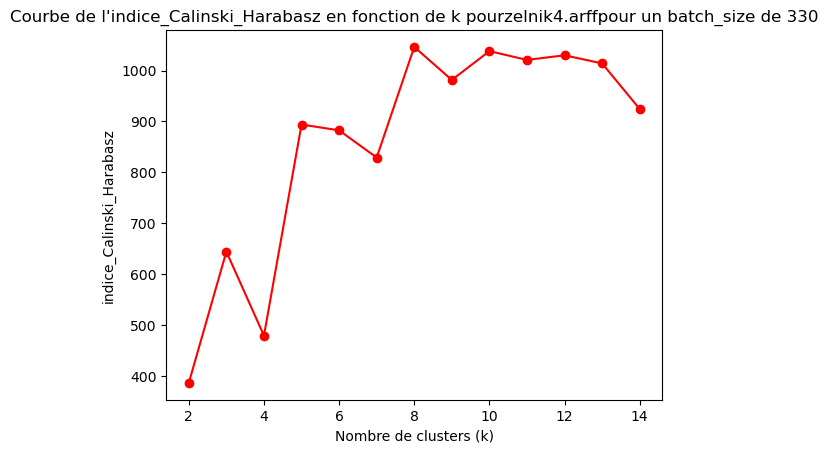

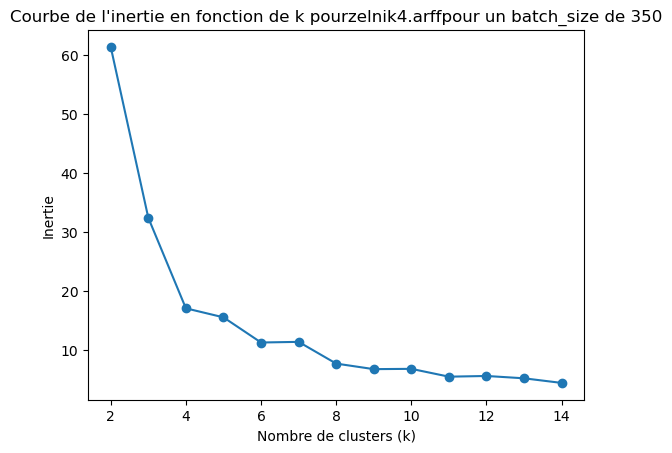

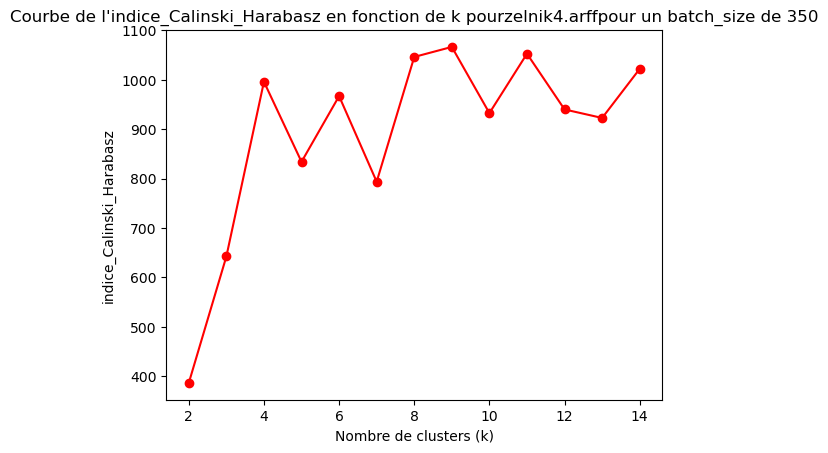

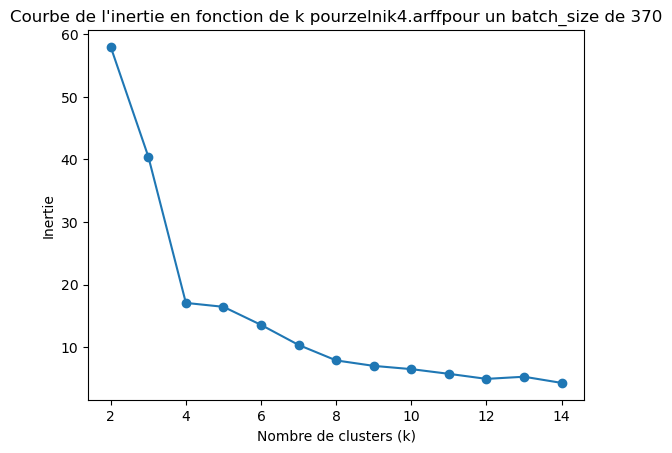

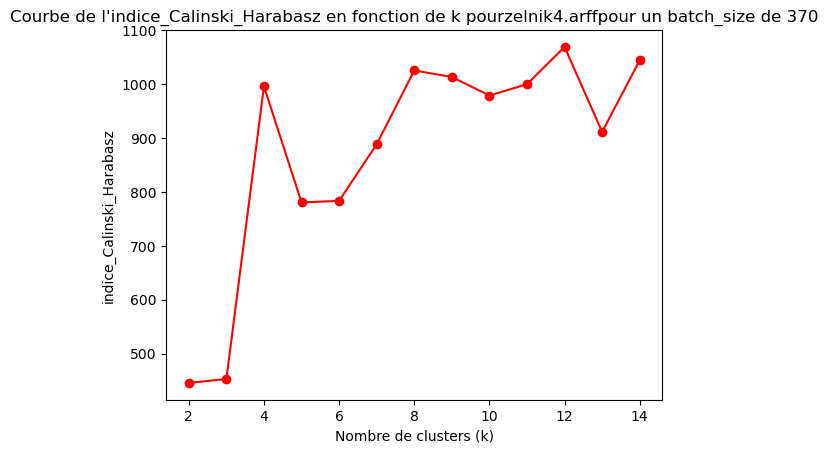

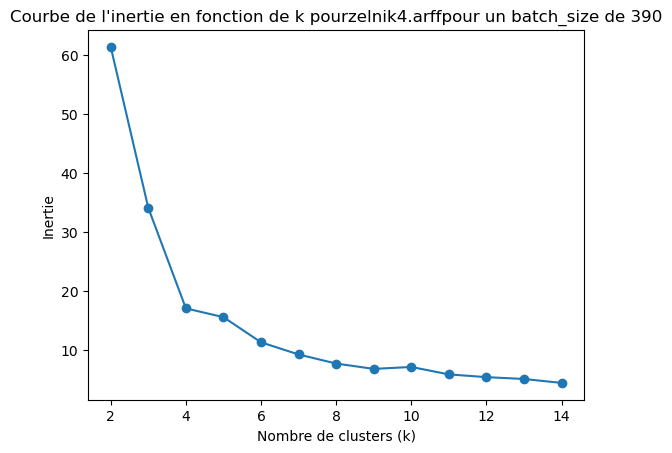

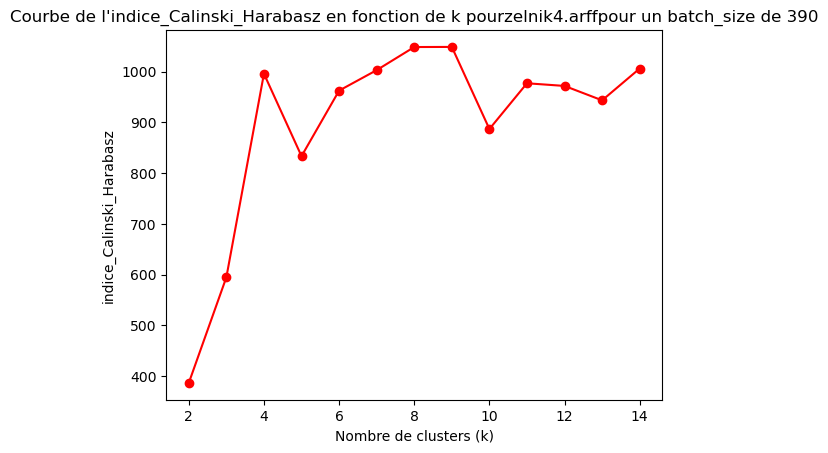

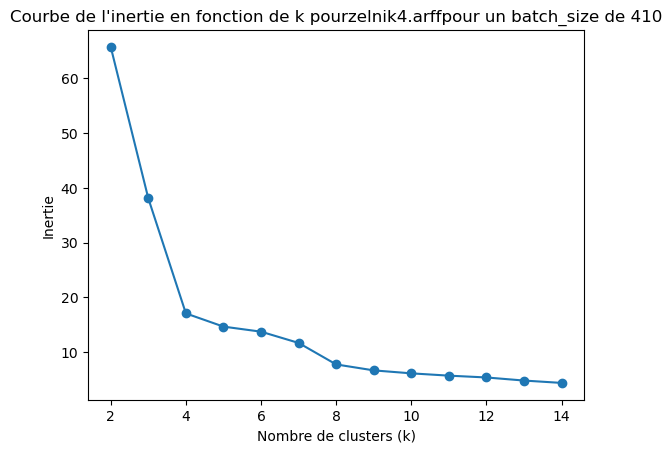

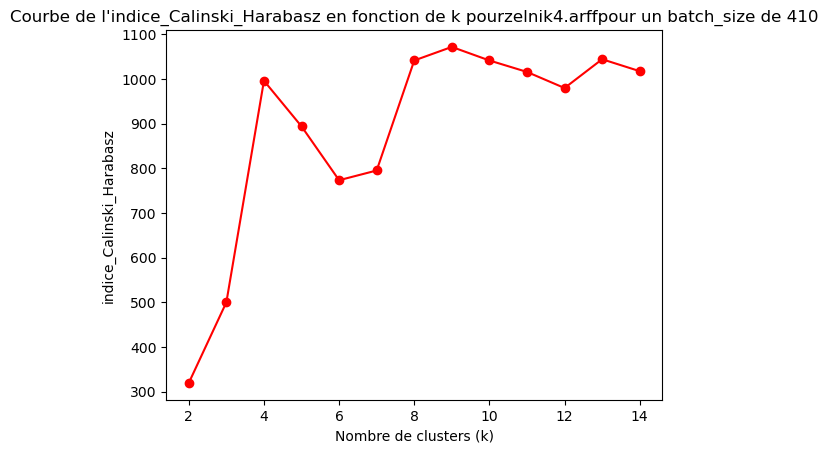

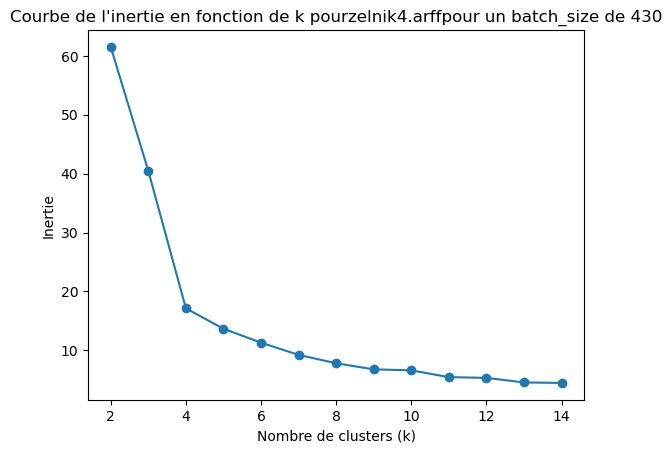

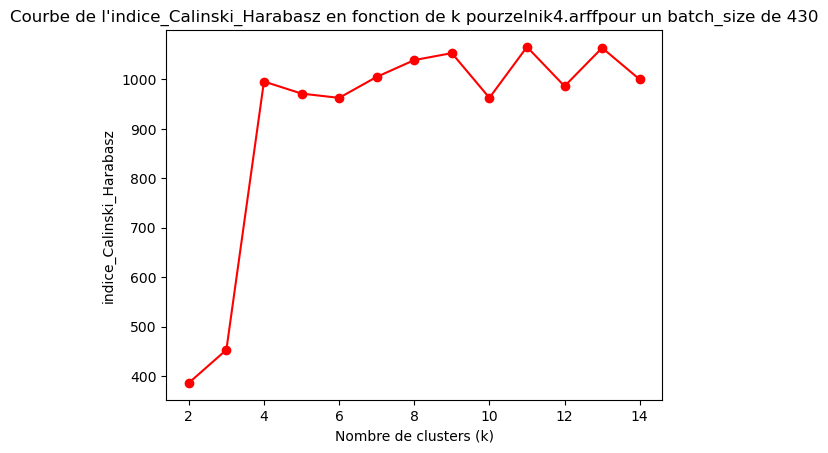

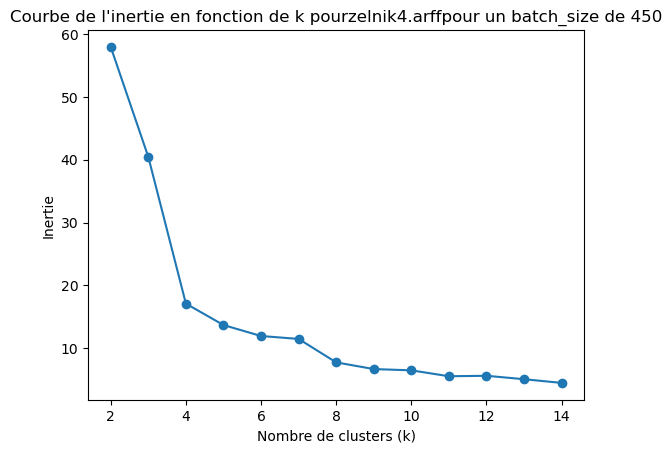

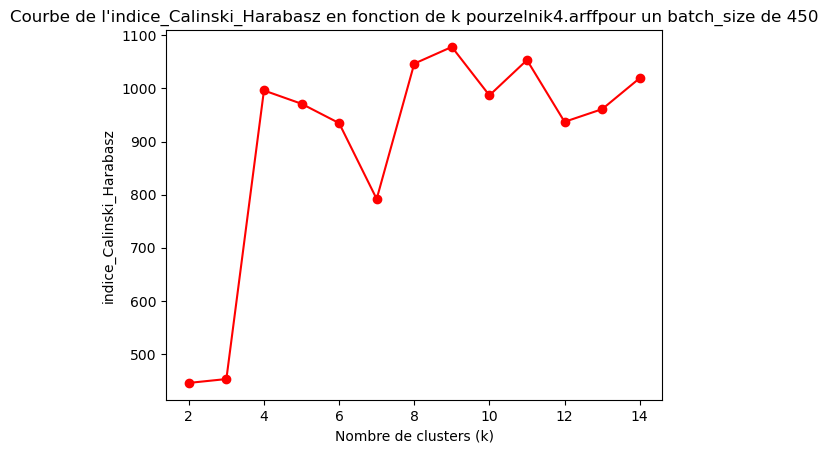

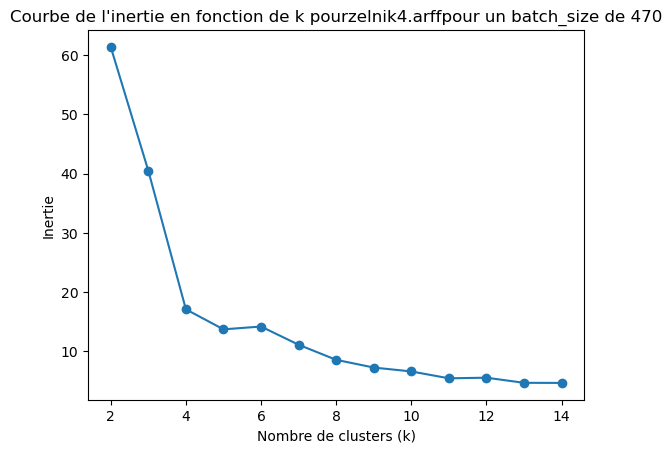

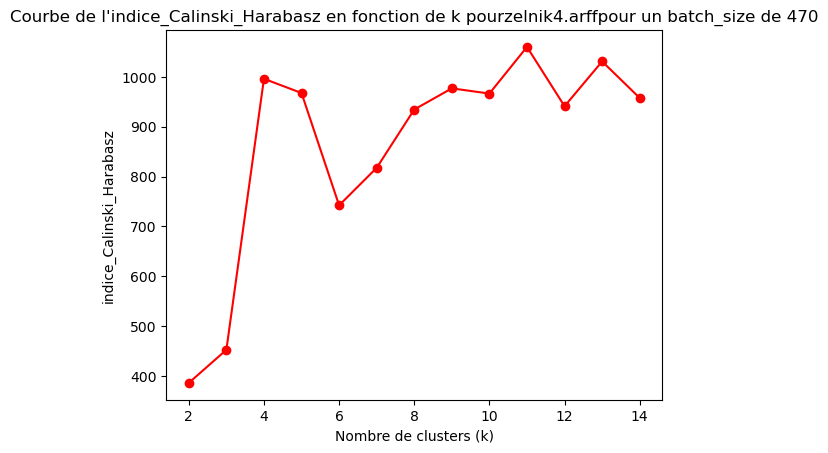

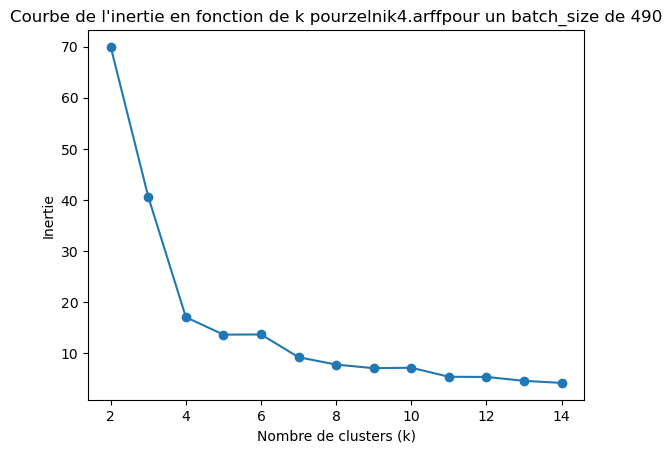

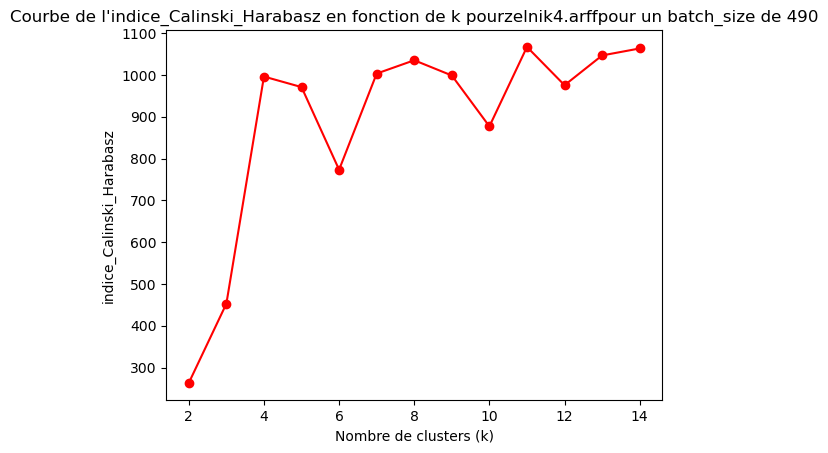

In [12]:
name = ["xclara.arff", "zelnik4.arff"]
for n in name : 
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])
    k_valeurs = range(2, 15)
    b_size = range (10,500,20)
    for b in b_size :
        inertie = []
        indice_Calinski_Harabasz = []
        for k in k_valeurs : 
            #print("------------------------------------------------------")
            #print("Appel KMeans pour une valeur de k ", k)
            tps1 = time.time()
            model = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=b, n_init=1)
            #model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
            model.fit(datanp)
            tps2 = time.time()
            labels = model.labels_
            # informations sur le clustering obtenu
            iteration = model.n_iter_
            inertie.append(model.inertia_)
            centroids = model.cluster_centers_
            indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))
        plt.plot(k_valeurs, inertie, marker='o')
        plt.xlabel("Nombre de clusters (k)")
        plt.ylabel("Inertie")
        plt.title("Courbe de l'inertie en fonction de k pour" + n + "pour un batch_size de " + str(b))
        plt.show()

        plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o', color='red')
        plt.xlabel("Nombre de clusters (k)")
        plt.ylabel("indice_Calinski_Harabasz")
        plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour" + n + "pour un batch_size de " + str(b))
        plt.show()

### Remarque
On voit assez peu de variation en changeant la valeur du Batch_size

## Bon Datasets pour Mini-Batch

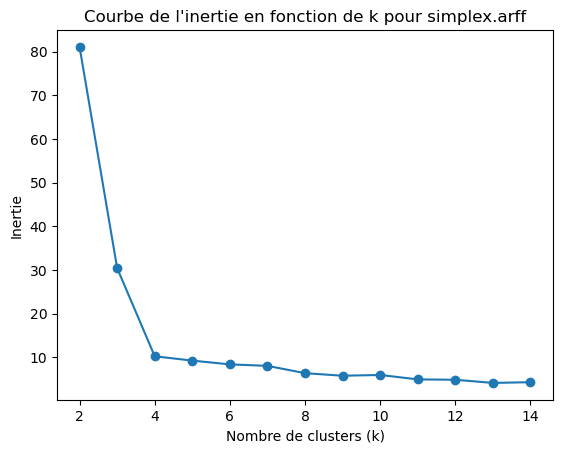

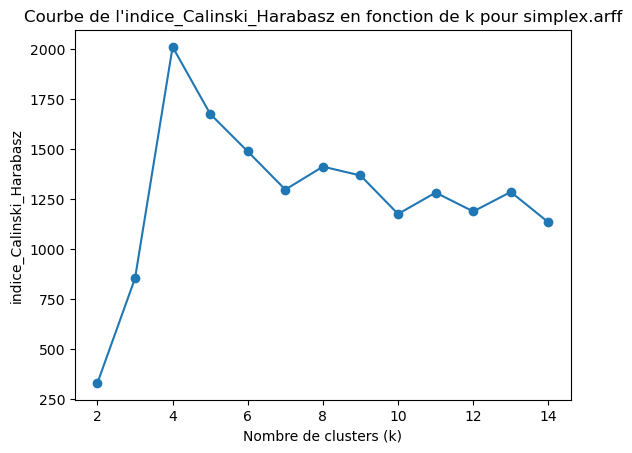

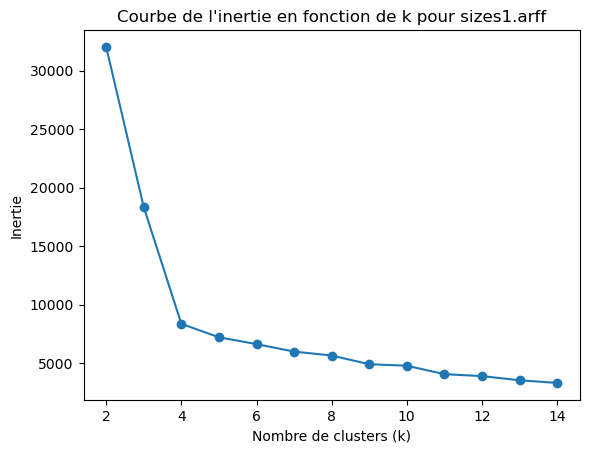

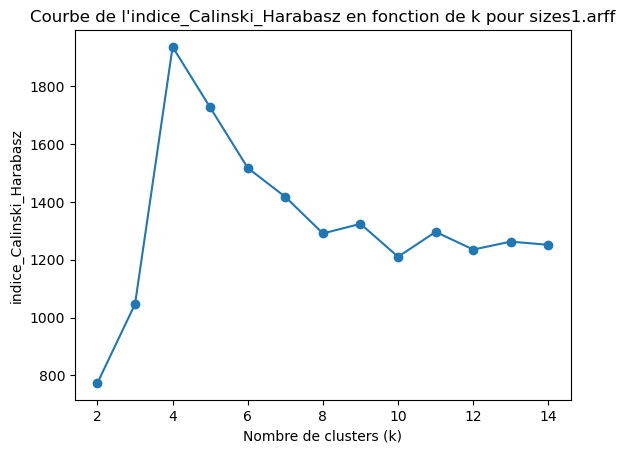

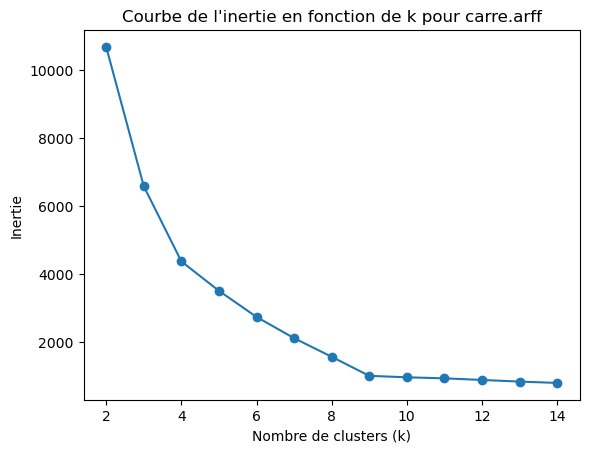

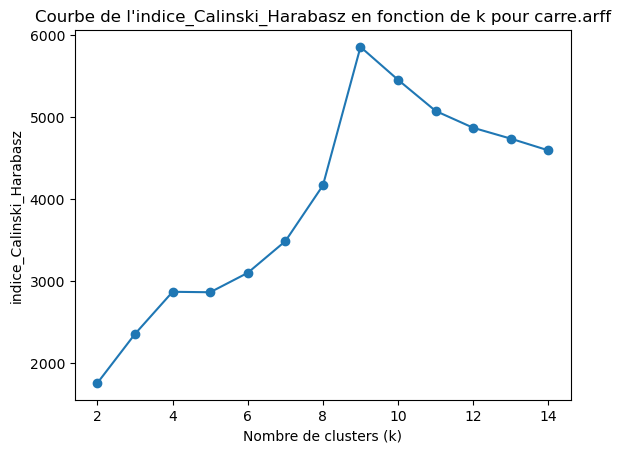

In [10]:
name = ["simplex.arff", "sizes1.arff", "carre.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=100, n_init=1)
        #model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()

## Mauvais Datasets pour Mini-Batch

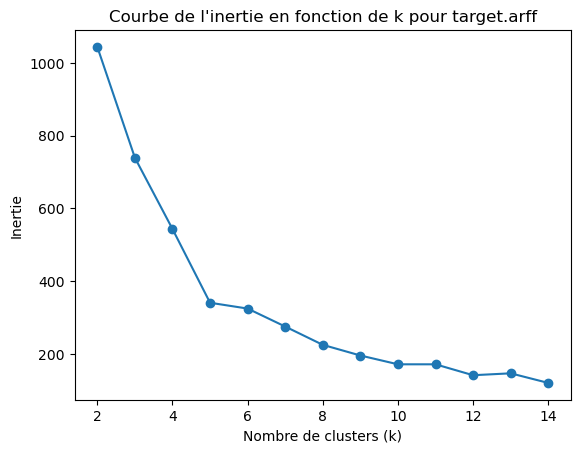

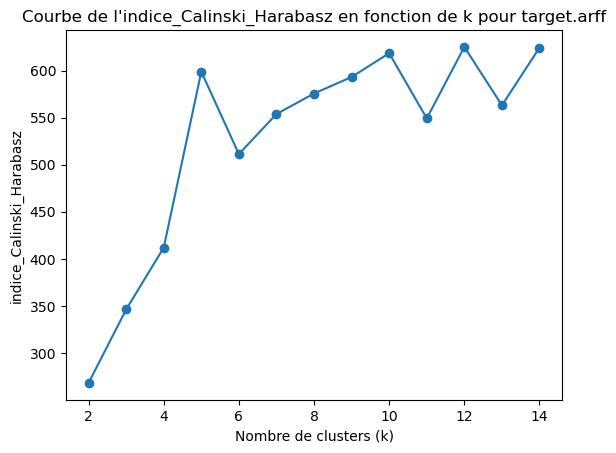

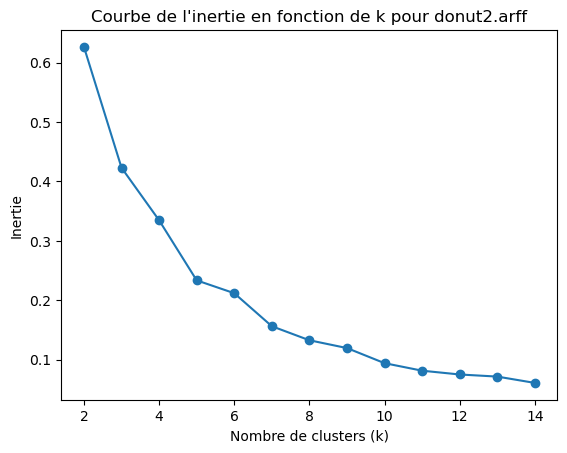

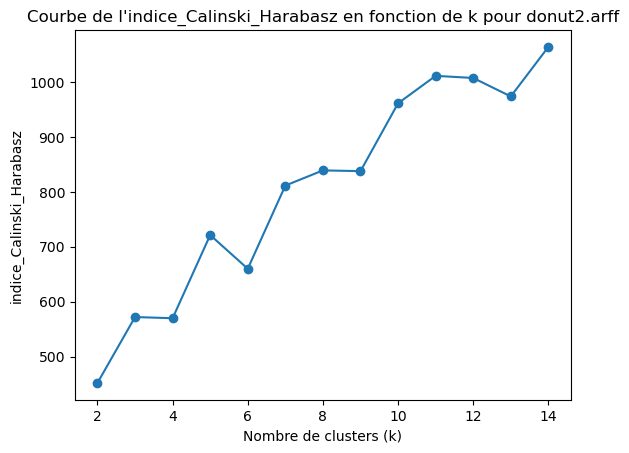

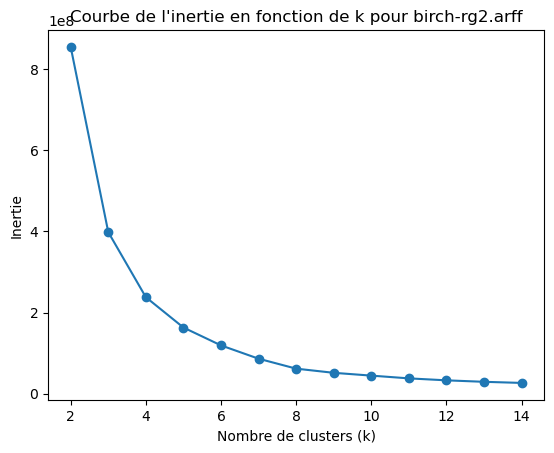

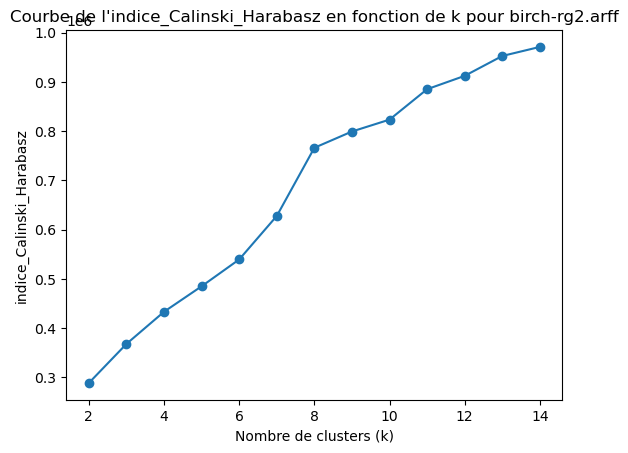

In [3]:
name = ["target.arff", "donut2.arff", "birch-rg2.arff"]

for n in name : 
    #path_out = './fig/'
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])

    k_valeurs = range(2, 15)
    inertie = []
    indice_Calinski_Harabasz = []
    for k in k_valeurs : 
        #print("------------------------------------------------------")
        #print("Appel KMeans pour une valeur de k ", k)
        tps1 = time.time()
        model = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=100, n_init=1)
        #model = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model.fit(datanp)
        tps2 = time.time()
        labels = model.labels_
        # informations sur le clustering obtenu
        iteration = model.n_iter_
        inertie.append(model.inertia_)
        centroids = model.cluster_centers_
        indice_Calinski_Harabasz.append(metrics.calinski_harabasz_score(datanp, labels))

    plt.plot(k_valeurs, inertie, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz, marker='o')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.show()

# Superposition de K-Means et Mini-Batch

## Bon Datasets

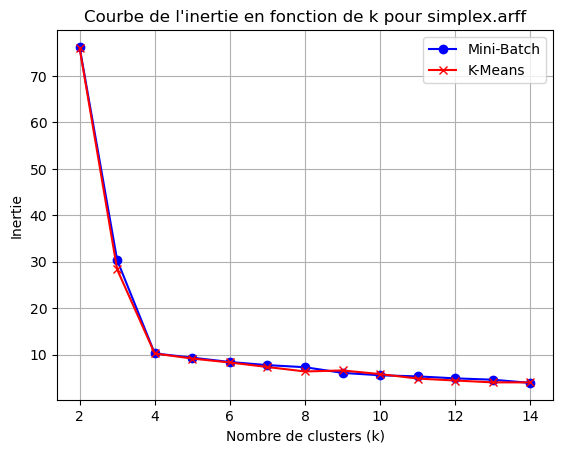

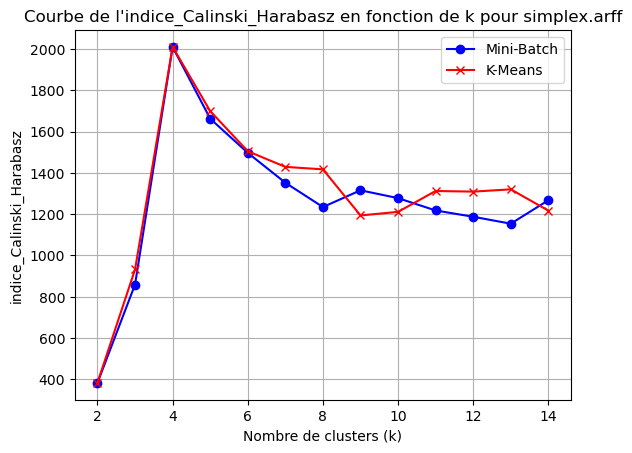

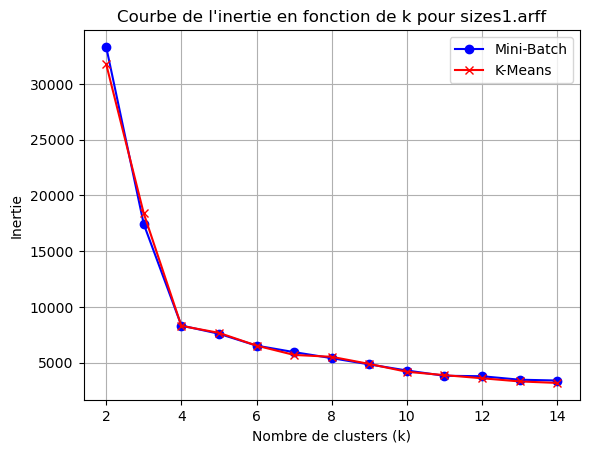

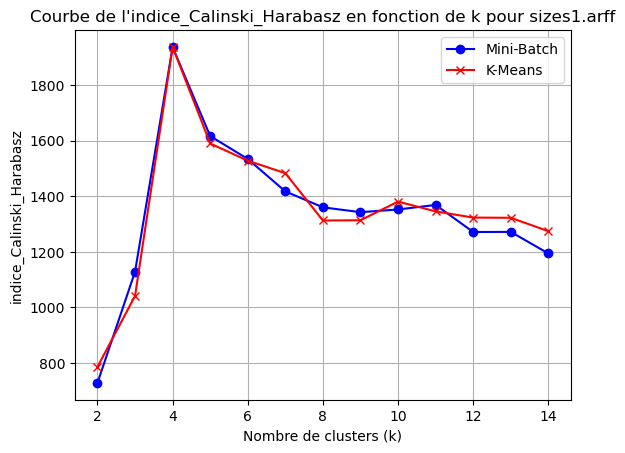

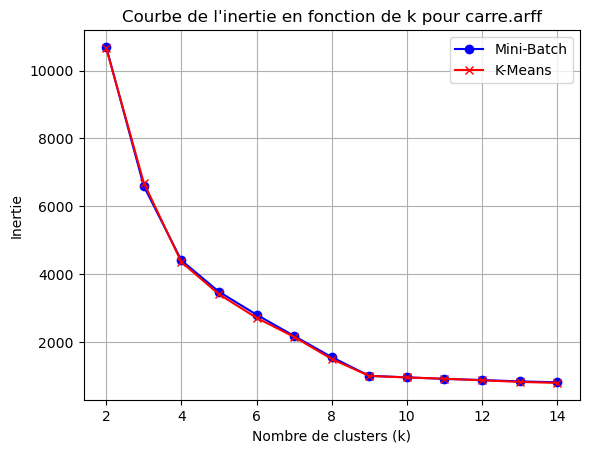

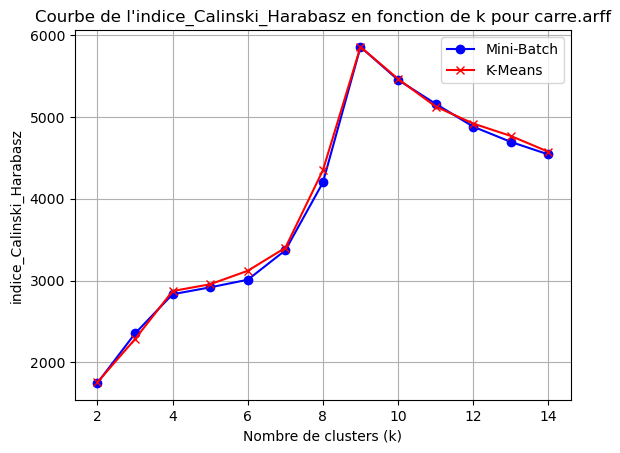

In [9]:
name = ["simplex.arff", "sizes1.arff", "carre.arff"]
for n in name : 
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])
    k_valeurs = range(2, 15)


    inertie_mini_batch = []
    inertie_k_means = []
    indice_Calinski_Harabasz_mini_batch = []
    indice_Calinski_Harabasz_k_means = []

    for k in k_valeurs : 
        # --------------------- K-Means --------------------- #
        model_k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model_k_means.fit(datanp)
        labels_k_means = model_k_means.labels_
        # informations sur le clustering obtenu
        inertie_k_means.append(model_k_means.inertia_)
        centroids = model_k_means.cluster_centers_
        indice_Calinski_Harabasz_k_means.append(metrics.calinski_harabasz_score(datanp, labels_k_means))


        # --------------------- Mini-Batch --------------------- #
        model_mini_batch = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=100, n_init=1)
        model_mini_batch.fit(datanp)
        labels_mini_batch = model_mini_batch.labels_
        # informations sur le clustering obtenu
        inertie_mini_batch.append(model_mini_batch.inertia_)
        centroids_mini_batch = model_mini_batch.cluster_centers_
        indice_Calinski_Harabasz_mini_batch.append(metrics.calinski_harabasz_score(datanp, labels_mini_batch))



    plt.plot(k_valeurs, inertie_mini_batch, marker='o', label='Mini-Batch', color='blue')
    plt.plot(k_valeurs, inertie_k_means, marker='x', label='K-Means', color='red')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz_mini_batch, marker='o', label='Mini-Batch', color='blue')
    plt.plot(k_valeurs, indice_Calinski_Harabasz_k_means, marker='x', label='K-Means', color='red')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.legend()
    plt.grid(True)
    plt.show()

## Mauvais Datasets

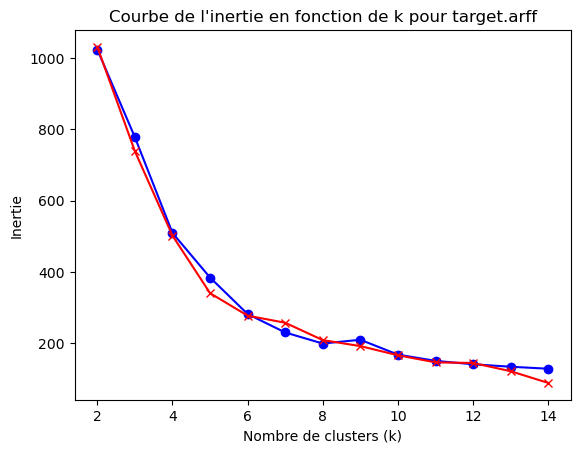

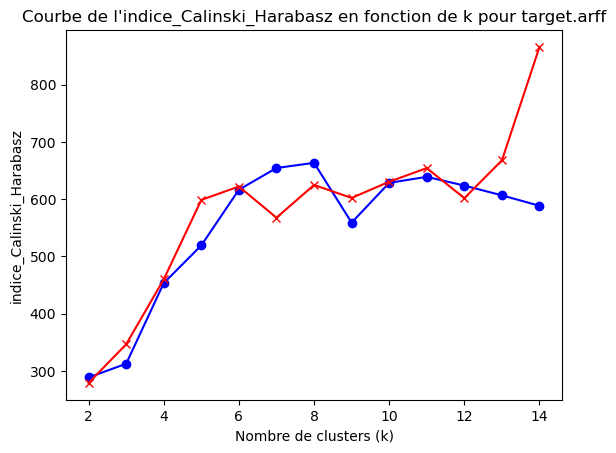

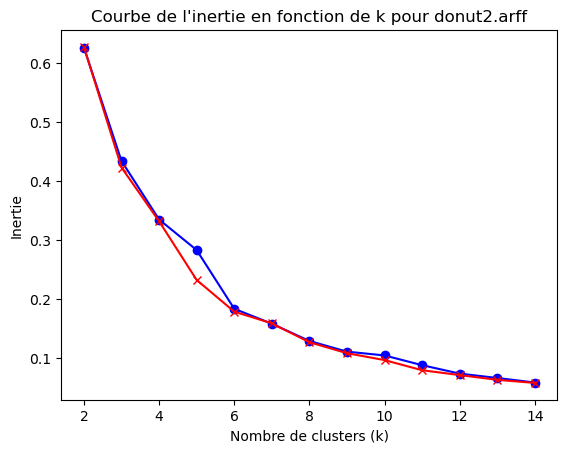

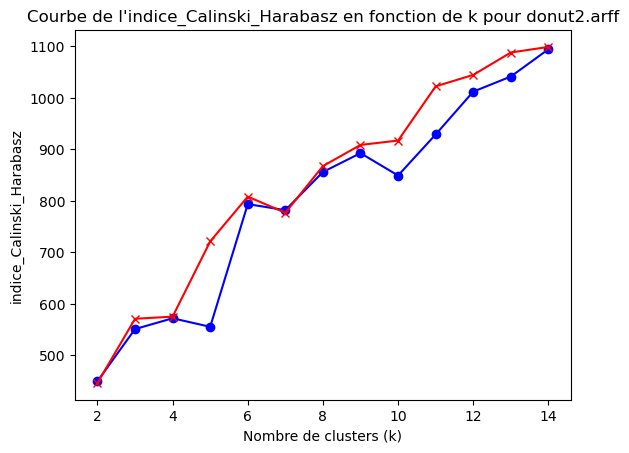

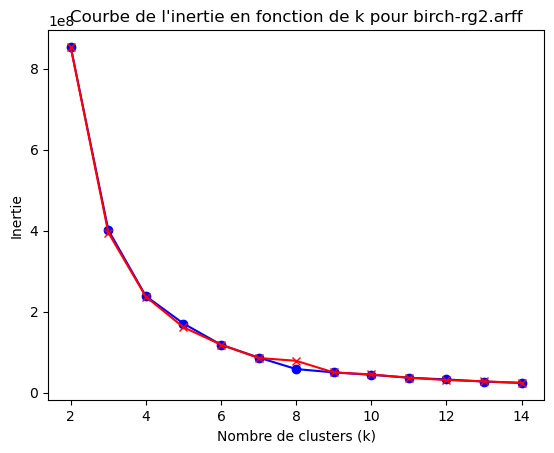

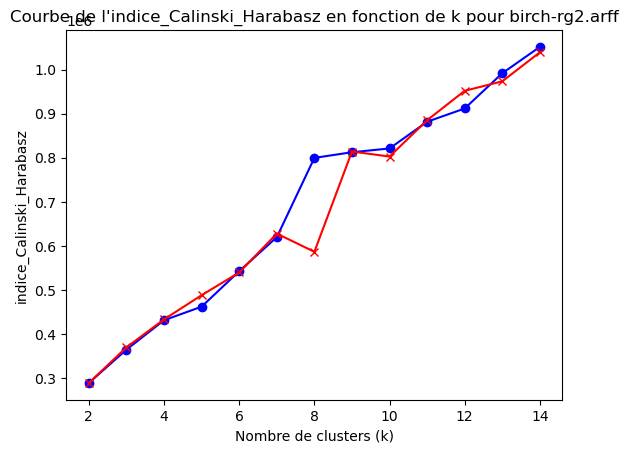

In [8]:
name = ["target.arff", "donut2.arff", "birch-rg2.arff"]
for n in name : 
    databrut = arff.loadarff(open(path+str(n), 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])
    k_valeurs = range(2, 15)


    inertie_mini_batch = []
    inertie_k_means = []
    indice_Calinski_Harabasz_mini_batch = []
    indice_Calinski_Harabasz_k_means = []

    for k in k_valeurs : 
        # --------------------- K-Means --------------------- #
        model_k_means = cluster.KMeans(n_clusters=k, init='k-means++', n_init=1)
        model_k_means.fit(datanp)
        labels_k_means = model_k_means.labels_
        # informations sur le clustering obtenu
        inertie_k_means.append(model_k_means.inertia_)
        centroids = model_k_means.cluster_centers_
        indice_Calinski_Harabasz_k_means.append(metrics.calinski_harabasz_score(datanp, labels_k_means))


        # --------------------- Mini-Batch --------------------- #
        model_mini_batch = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', batch_size=100, n_init=1)
        model_mini_batch.fit(datanp)
        labels_mini_batch = model_mini_batch.labels_
        # informations sur le clustering obtenu
        inertie_mini_batch.append(model_mini_batch.inertia_)
        centroids_mini_batch = model_mini_batch.cluster_centers_
        indice_Calinski_Harabasz_mini_batch.append(metrics.calinski_harabasz_score(datanp, labels_mini_batch))



    plt.plot(k_valeurs, inertie_mini_batch, marker='o', label='Mini-Batch', color='blue')
    plt.plot(k_valeurs, inertie_k_means, marker='x', label='K-Means', color='red')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("Inertie")
    plt.title("Courbe de l'inertie en fonction de k pour " + n)
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.plot(k_valeurs, indice_Calinski_Harabasz_mini_batch, marker='o', label='Mini-Batch', color='blue')
    plt.plot(k_valeurs, indice_Calinski_Harabasz_k_means, marker='x', label='K-Means', color='red')
    plt.xlabel("Nombre de clusters (k)")
    plt.ylabel("indice_Calinski_Harabasz")
    plt.title("Courbe de l'indice_Calinski_Harabasz en fonction de k pour " + n)
    plt.legend()
    plt.grid(True)
    plt.show()